# Análisis de cambio de entrenador con estadística descriptiva

En este cuaderno se realizó en el proceso para obtener datos estadísticos que ayudan a determinar el efecto de cambio de entrenador a corto plazo en las ligas europeas, latinoamericanas y femeninas. Posteriormente se empleó la regresión lineal en algunas variables afines de los Datasets para observar su comportamiento antes y después del cambio de entrenador.

# Setting Preliminares

Instalar libreria de pandas-profiling

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     | 22.0 MB 127 kB/s
     |████████████████████████████████| 102 kB 5.3 MB/s 
     |████████████████████████████████| 679 kB 40.7 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 9.9 MB 39.5 MB/s 
     |████████████████████████████████| 4.7 MB 48.3 MB/s 
     |████████████████████████████████| 296 kB 56.8 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-dev-py2.py3-none-any.whl size=328532 sha256=075be99ea6e5d7b237f04a9e405b5f9e81a8ca9ff3b633ec28b892b09979ca87
  Stored in directory: /tmp/pip-ephem-wheel-cache-h3u241dt/wheels/64/b6/85/dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=94d85c8eaf4230614aadcd51a49c8c9f6b354b08990a5aff50817e6322d3d9f7
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b

Iniciamos importando las librerías básicas que utilizaremos a lo largo del procesamiento de datos.

In [ ]:
# carga de datos
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')
import io
from google.colab import files

# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns

import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from numpy import corrcoef, transpose, arange
from pylab import pcolor, show, colorbar, xticks, yticks

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None



# Carga de Datos

Función de Google Colab para cargar datos.
Subimos los datos de entrenamiento sin campo objetivo (dengue_features_train)

In [ ]:
def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
    return df

In [ ]:
#europa_promedio_goles.csv
europa = upload_files()
europa

Saving europa_promedio_goles.csv to europa_promedio_goles.csv
User uploaded file "europa_promedio_goles.csv" with length 705148 bytes


,jornada,fecha,puntos_actuales,equipo,liga,entrenador_nuevo,promedio_goles_hechos_antes_de_cambio_entrenador_1_5,promedio_goles_hechos_despues_de_cambio_entrenador_1_5,promedio_goles_recibidos_antes_de_cambio_entrenador_1_5,promedio_goles_recibidos_despues_de_cambio_entrenador_1_5,puntos_hechos_antes_de_cambio_entrenador_1_5,puntos_hechos_despues_de_cambio_entrenador_1_5,porcentaje_victorias_despues_de_cambio_entrenador_1_5,porcentaje_victorias_antes_de_cambio_entrenador_1_5,porcentaje_empates_despues_de_cambio_entrenador_1_5,porcentaje_empates_antes_de_cambio_entrenador_1_5,porcentaje_derrotas_despues_de_cambio_entrenador_1_5,porcentaje_derrotas_antes_de_cambio_entrenador_1_5
0,1,09-08-2009,1,SC Freiburg,bundesliga,Robin Dutt,1.4,0.8,2.8,2.4,1,4,0.2,0.0,0.2,0.2,0.6,0.8
1,1,06-08-2011,1,SC Freiburg,bundesliga,Marcus Sorg,0.6,1.8,1.8,3.2,3,4,0.2,0.2,0.2,0.0,0.6,0.8
2,18,21-01-2012,16,SC Freiburg,bundesliga,Christian Streich,1.0,1.2,2.4,1.6,3,5,0.2,0.0,0.4,0.6,0.4,0.4
3,1,26-08-2018,0,RB Leipzig,bundesliga,Ralf Rangnick,2.6,1.6,2.4,1.6,7,8,0.4,0.4,0.4,0.2,0.2,0.4
4,1,18-08-2019,3,RB Leipzig,bundesliga,Julian Nagelsmann,1.6,2.6,1.4,0.6,8,13,0.8,0.4,0.2,0.4,0.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6972,1,04-10-1942,0,AC Liguria,serie_a_italia,Tony Cargnelli,0.6,0.6,2.0,1.8,7,4,0.2,0.4,0.2,0.2,0.6,0.4
6973,1,18-09-1932,3,Pro Vercelli,serie_a_italia,Guido Ara,1.4,0.8,1.2,1.6,7,4,0.2,0.4,0.2,0.2,0.6,0.4
6974,11,06-01-1935,4,Pro Vercelli,serie_a_italia,Pietro Leone I,0.6,1.2,1.4,2.0,3,3,0.2,0.2,0.0,0.0,0.8,0.8
6975,22,19-03-1933,18,Casale,serie_a_italia,Secondo Siviardo,1.2,1.0,3.2,1.8,1,8,0.4,0.0,0.4,0.2,0.2,0.8


In [ ]:
#europa_femenina_promedio_goles.csv
europa_femenina = upload_files()
europa_femenina

Saving europa_femenina_promedio_goles.csv to europa_femenina_promedio_goles.csv
User uploaded file "europa_femenina_promedio_goles.csv" with length 44062 bytes


,jornada,fecha,puntos_actuales,equipo,liga,entrenador_nuevo,promedio_goles_hechos_antes_de_cambio_entrenador_1_5,promedio_goles_hechos_despues_de_cambio_entrenador_1_5,promedio_goles_recibidos_antes_de_cambio_entrenador_1_5,promedio_goles_recibidos_despues_de_cambio_entrenador_1_5,puntos_hechos_antes_de_cambio_entrenador_1_5,puntos_hechos_despues_de_cambio_entrenador_1_5,porcentaje_victorias_despues_de_cambio_entrenador_1_5,porcentaje_victorias_antes_de_cambio_entrenador_1_5,porcentaje_empates_despues_de_cambio_entrenador_1_5,porcentaje_empates_antes_de_cambio_entrenador_1_5,porcentaje_derrotas_despues_de_cambio_entrenador_1_5,porcentaje_derrotas_antes_de_cambio_entrenador_1_5
0,8,15-11-2015,2,Colonia,bundesliga_femenina,Nico Reese,1.0,0.5,2.8,2.5,1,1,0.0,0.0,0.5,0.2,0.5,0.8
1,10,06-12-2015,5,Colonia,bundesliga_femenina,Marcus Kühn,1.0,0.8,2.2,1.4,2,4,0.2,0.0,0.2,0.4,0.6,0.6
2,1,03-09-2017,0,Colonia,bundesliga_femenina,Willi Breuer,1.4,0.4,3.0,3.8,6,0,0.0,0.4,0.0,0.0,1.0,0.6
3,12,04-06-2020,8,Colonia,bundesliga_femenina,Sascha Glass,2.0,1.0,3.4,1.0,3,1,0.0,0.2,1.0,0.0,0.0,0.8
4,13,15-12-2019,8,Colonia,bundesliga_femenina,Willi Breuer,2.0,0.0,3.0,1.0,4,0,0.0,0.2,0.0,0.2,1.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,1,04-07-2020,0,Vålerenga IF,toppserien_noruega_femenina,Jack Majgaard,1.6,2.2,0.6,1.0,11,12,0.8,0.6,0.0,0.4,0.2,0.0
376,1,28-03-2016,3,Avaldsnes IL,toppserien_noruega_femenina,Kent Michael Bøe,3.8,2.0,0.2,1.0,15,12,0.8,1.0,0.0,0.0,0.2,0.0
377,1,01-05-2018,0,Avaldsnes IL,toppserien_noruega_femenina,Lena Tyriberget,2.8,0.8,0.8,2.0,12,3,0.2,0.8,0.0,0.0,0.8,0.2
378,1,17-04-2017,3,Lillestrøm SK,toppserien_noruega_femenina,Hege Riise,4.6,4.4,0.8,1.2,13,13,0.8,0.8,0.2,0.2,0.0,0.0


In [ ]:
#latinoamerica_promedio_goles.csv
latinoamerica = upload_files()
latinoamerica

Saving latinoamerica_promedio_goles.csv to latinoamerica_promedio_goles.csv
User uploaded file "latinoamerica_promedio_goles.csv" with length 241146 bytes


,jornada,fecha,puntos_actuales,equipo,liga,entrenador_nuevo,promedio_goles_hechos_antes_de_cambio_entrenador_1_5,promedio_goles_hechos_despues_de_cambio_entrenador_1_5,promedio_goles_recibidos_antes_de_cambio_entrenador_1_5,promedio_goles_recibidos_despues_de_cambio_entrenador_1_5,puntos_hechos_antes_de_cambio_entrenador_1_5,puntos_hechos_despues_de_cambio_entrenador_1_5,porcentaje_victorias_despues_de_cambio_entrenador_1_5,porcentaje_victorias_antes_de_cambio_entrenador_1_5,porcentaje_empates_despues_de_cambio_entrenador_1_5,porcentaje_empates_antes_de_cambio_entrenador_1_5,porcentaje_derrotas_despues_de_cambio_entrenador_1_5,porcentaje_derrotas_antes_de_cambio_entrenador_1_5
0,1,03-02-2008,0,Once Caldas,betplay_dimayor,Jorge Bernal,1.6,1.2,0.8,1.4,8,6,0.4,0.4,0.0,0.4,0.6,0.2
1,1,08-02-2009,3,Once Caldas,betplay_dimayor,Javier Álvarez,0.8,1.2,0.2,1.4,10,5,0.2,0.6,0.4,0.2,0.4,0.2
2,1,31-01-2010,0,Once Caldas,betplay_dimayor,Juan Carlos Osorio,1.8,2.0,2.4,2.0,3,5,0.2,0.0,0.4,0.6,0.4,0.4
3,1,29-01-2012,1,Once Caldas,betplay_dimayor,Luis Páez,2.4,1.0,1.2,1.4,9,3,0.0,0.6,0.6,0.0,0.4,0.4
4,1,29-07-2012,3,Once Caldas,betplay_dimayor,Guillermo Hoyos,1.4,1.8,1.8,1.2,3,9,0.6,0.0,0.0,0.6,0.4,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162,1,14-02-2000,0,Ferro Carril Oeste,primera_division_argentina,Juan Rocchia,1.2,1.0,3.2,1.6,2,6,0.4,0.0,0.0,0.4,0.6,0.6
2163,1,22-02-1997,1,Deportivo Español,primera_division_argentina,Eduardo Manera,1.4,1.6,1.6,1.6,4,6,0.2,0.0,0.6,0.8,0.2,0.2
2164,1,25-03-1994,1,Gimnasia y Tiro de Salta,primera_division_argentina,Victorio Cocco,0.8,1.0,1.0,0.8,7,8,0.4,0.4,0.4,0.2,0.2,0.4
2165,1,13-08-1989,3,Deportivo Mandiyú,primera_division_argentina,Osvaldo Sosa,4.0,0.4,4.0,0.4,6,8,0.4,0.4,0.4,0.0,0.2,0.6


In [ ]:
europa.dtypes

jornada                                                        int64
fecha                                                         object
puntos_actuales                                                int64
equipo                                                        object
liga                                                          object
entrenador_nuevo                                              object
promedio_goles_hechos_antes_de_cambio_entrenador_1_5         float64
promedio_goles_hechos_despues_de_cambio_entrenador_1_5       float64
promedio_goles_recibidos_antes_de_cambio_entrenador_1_5      float64
promedio_goles_recibidos_despues_de_cambio_entrenador_1_5    float64
puntos_hechos_antes_de_cambio_entrenador_1_5                   int64
puntos_hechos_despues_de_cambio_entrenador_1_5                 int64
porcentaje_victorias_despues_de_cambio_entrenador_1_5        float64
porcentaje_victorias_antes_de_cambio_entrenador_1_5          float64
porcentaje_empates_despues_de_camb

In [ ]:
europa_femenina.dtypes

jornada                                                        int64
fecha                                                         object
puntos_actuales                                                int64
equipo                                                        object
liga                                                          object
entrenador_nuevo                                              object
promedio_goles_hechos_antes_de_cambio_entrenador_1_5         float64
promedio_goles_hechos_despues_de_cambio_entrenador_1_5       float64
promedio_goles_recibidos_antes_de_cambio_entrenador_1_5      float64
promedio_goles_recibidos_despues_de_cambio_entrenador_1_5    float64
puntos_hechos_antes_de_cambio_entrenador_1_5                   int64
puntos_hechos_despues_de_cambio_entrenador_1_5                 int64
porcentaje_victorias_despues_de_cambio_entrenador_1_5        float64
porcentaje_victorias_antes_de_cambio_entrenador_1_5          float64
porcentaje_empates_despues_de_camb

In [ ]:
latinoamerica.dtypes

jornada                                                        int64
fecha                                                         object
puntos_actuales                                                int64
equipo                                                        object
liga                                                          object
entrenador_nuevo                                              object
promedio_goles_hechos_antes_de_cambio_entrenador_1_5         float64
promedio_goles_hechos_despues_de_cambio_entrenador_1_5       float64
promedio_goles_recibidos_antes_de_cambio_entrenador_1_5      float64
promedio_goles_recibidos_despues_de_cambio_entrenador_1_5    float64
puntos_hechos_antes_de_cambio_entrenador_1_5                   int64
puntos_hechos_despues_de_cambio_entrenador_1_5                 int64
porcentaje_victorias_despues_de_cambio_entrenador_1_5        float64
porcentaje_victorias_antes_de_cambio_entrenador_1_5          float64
porcentaje_empates_despues_de_camb

In [ ]:
europa.fecha = pd.to_datetime(europa.fecha, errors = 'coerce')
europa_femenina.fecha = pd.to_datetime(europa_femenina.fecha, errors = 'coerce')
latinoamerica.fecha = pd.to_datetime(latinoamerica.fecha, errors = 'coerce')

#Análisis Descriptivo

Se utiliza la librería pandas-profiling para generar un reporte de datos estadísticos en cada uno de los Datasets.

In [ ]:
europa.profile_report()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
europa_femenina.profile_report()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
latinoamerica.profile_report()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
europa.describe()

,jornada,puntos_actuales,promedio_goles_hechos_antes_de_cambio_entrenador_1_5,promedio_goles_hechos_despues_de_cambio_entrenador_1_5,promedio_goles_recibidos_antes_de_cambio_entrenador_1_5,promedio_goles_recibidos_despues_de_cambio_entrenador_1_5,puntos_hechos_antes_de_cambio_entrenador_1_5,puntos_hechos_despues_de_cambio_entrenador_1_5,porcentaje_victorias_despues_de_cambio_entrenador_1_5,porcentaje_victorias_antes_de_cambio_entrenador_1_5,porcentaje_empates_despues_de_cambio_entrenador_1_5,porcentaje_empates_antes_de_cambio_entrenador_1_5,porcentaje_derrotas_despues_de_cambio_entrenador_1_5,porcentaje_derrotas_antes_de_cambio_entrenador_1_5
count,6977.000000,6977.000000,6977.000000,6977.000000,6977.000000,6977.000000,6977.000000,6977.000000,6977.000000,6977.000000,6977.000000,6977.000000,6977.000000,6977.000000
mean,9.840619,10.741436,1.230882,1.293541,1.662061,1.460231,5.355740,5.808944,0.329232,0.275219,0.266996,0.245550,0.403772,0.479232
std,10.813968,13.288273,0.665212,0.735804,0.686268,0.768082,3.189384,3.444604,0.258914,0.225002,0.233565,0.196442,0.275475,0.245112
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.800000,0.800000,1.200000,1.000000,3.000000,3.000000,0.200000,0.200000,0.000000,0.000000,0.200000,0.400000
50%,1.000000,3.000000,1.200000,1.200000,1.600000,1.400000,5.000000,6.000000,0.333333,0.200000,0.200000,0.200000,0.400000,0.400000
75%,18.000000,18.000000,1.600000,1.600000,2.000000,1.800000,7.000000,8.000000,0.400000,0.400000,0.400000,0.400000,0.600000,0.600000
max,43.000000,91.000000,5.200000,9.000000,5.000000,9.000000,15.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
europa_femenina.describe()

,jornada,puntos_actuales,promedio_goles_hechos_antes_de_cambio_entrenador_1_5,promedio_goles_hechos_despues_de_cambio_entrenador_1_5,promedio_goles_recibidos_antes_de_cambio_entrenador_1_5,promedio_goles_recibidos_despues_de_cambio_entrenador_1_5,puntos_hechos_antes_de_cambio_entrenador_1_5,puntos_hechos_despues_de_cambio_entrenador_1_5,porcentaje_victorias_despues_de_cambio_entrenador_1_5,porcentaje_victorias_antes_de_cambio_entrenador_1_5,porcentaje_empates_despues_de_cambio_entrenador_1_5,porcentaje_empates_antes_de_cambio_entrenador_1_5,porcentaje_derrotas_despues_de_cambio_entrenador_1_5,porcentaje_derrotas_antes_de_cambio_entrenador_1_5
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,4.413158,5.134211,1.530351,1.626053,1.855263,1.685965,6.300000,6.565789,0.402149,0.366140,0.179386,0.168947,0.418465,0.464912
std,5.680159,7.650022,0.961531,1.194561,1.080310,1.146781,4.500894,4.738924,0.333360,0.316515,0.221050,0.209998,0.332200,0.317933
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.800000,0.800000,1.000000,1.000000,3.000000,3.000000,0.200000,0.000000,0.000000,0.000000,0.200000,0.200000
50%,1.000000,3.000000,1.300000,1.400000,1.600000,1.500000,6.000000,6.000000,0.400000,0.400000,0.200000,0.200000,0.400000,0.400000
75%,7.000000,6.000000,2.000000,2.200000,2.600000,2.200000,9.250000,10.000000,0.600000,0.600000,0.200000,0.200000,0.600000,0.600000
max,30.000000,50.000000,4.800000,7.000000,6.000000,8.000000,15.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
latinoamerica.describe()

,jornada,puntos_actuales,promedio_goles_hechos_antes_de_cambio_entrenador_1_5,promedio_goles_hechos_despues_de_cambio_entrenador_1_5,promedio_goles_recibidos_antes_de_cambio_entrenador_1_5,promedio_goles_recibidos_despues_de_cambio_entrenador_1_5,puntos_hechos_antes_de_cambio_entrenador_1_5,puntos_hechos_despues_de_cambio_entrenador_1_5,porcentaje_victorias_despues_de_cambio_entrenador_1_5,porcentaje_victorias_antes_de_cambio_entrenador_1_5,porcentaje_empates_despues_de_cambio_entrenador_1_5,porcentaje_empates_antes_de_cambio_entrenador_1_5,porcentaje_derrotas_despues_de_cambio_entrenador_1_5,porcentaje_derrotas_antes_de_cambio_entrenador_1_5
count,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000
mean,8.919705,10.095524,1.080165,1.147339,1.430972,1.264275,5.371943,5.532995,0.325096,0.267059,0.288971,0.274350,0.385933,0.458591
std,8.819835,11.373399,0.550091,0.642647,0.582128,0.693002,2.973429,3.418987,0.265933,0.208691,0.253786,0.199027,0.285878,0.238593
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.600000,0.800000,1.000000,0.800000,3.000000,3.000000,0.200000,0.200000,0.000000,0.200000,0.200000,0.200000
50%,7.000000,5.000000,1.000000,1.000000,1.400000,1.200000,5.000000,6.000000,0.400000,0.200000,0.200000,0.200000,0.400000,0.400000
75%,15.000000,16.000000,1.400000,1.500000,1.800000,1.600000,7.000000,8.000000,0.400000,0.400000,0.400000,0.400000,0.600000,0.600000
max,44.000000,68.000000,4.000000,6.000000,4.000000,6.000000,15.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Medias y desviación por variable especifica
variable='porcentaje_derrotas_antes_de_cambio_entrenador_1_5'
eu=europa.describe()
euf=europa_femenina.describe()
lm=latinoamerica.describe()
print('Europa mediana: '+ str(eu[variable][5]))
print('Europa Std: '+ str(eu[variable][2]))
print('Europa media: '+ str(eu[variable][1]))
print('Europa f mediana: '+ str(euf[variable][5]))
print('Europa f Std: '+ str(euf[variable][2]))
print('Europa f media: '+ str(euf[variable][1]))
print('Europa mediana: '+ str(lm[variable][5]))
print('Europa Std: '+ str(lm[variable][2]))
print('Europa media: '+ str(lm[variable][1]))


Europa mediana: 0.4
Europa Std: 0.24511168051066992
Europa media: 0.4792317615020783
Europa f mediana: 0.4
Europa f Std: 0.31793338908597424
Europa f media: 0.46491228070175444
Europa mediana: 0.4
Europa Std: 0.23859252235856027
Europa media: 0.45859098600215353


# **Regresion Lineal Ligas Europeas Masculinas**

Dimensiones del Dataset Europa.

In [ ]:
df=europa
df.shape

(6977, 18)

In [ ]:
df.reset_index(drop = True, inplace = True) # reiniciar index

**Transformación de Dataframe (Europa)**

Se transforma el Dataframe acumulando el promedio por equipo de las siguientes variables:
-	promedio_goles_hechos_antes_de_cambio_entrenador_1_5
-	promedio_goles_hechos_despues_de_cambio_entrenador_1_5
-	promedio_goles_recibidos_antes_de_cambio_entrenador_1_5
-	promedio_goles_recibidos_despues_de_cambio_entrenador_1_5
-	puntos_hechos_antes_de_cambio_entrenador_1_5
-	puntos_hechos_despues_de_cambio_entrenador_1_5
-	porcentaje_victorias_antes_de_cambio_entrenador_1_5
-	porcentaje_victorias_despues_de_cambio_entrenador_1_5

Cada nueva estancia del Dataset transformado representa un club de fútbol.

In [ ]:
equipos=pd.unique(df['equipo'])

In [ ]:
equipo_lista = []
m_goles_hechos_antes = []
m_goles_hechos_despues = []
m_goles_recibidos_antes = []
m_goles_recibidos_despues = []
m_puntos_hechos_antes = []
m_puntos_hechos_despues = []
m_victorias_antes = []
m_victorias_despues = []

for equipo in equipos:
  equipo_actual = df[df['equipo']==equipo]
  equipo_actual_estadistica = equipo_actual.describe()

  equipo_lista.append(equipo)
  m_goles_hechos_antes.append(equipo_actual_estadistica['promedio_goles_hechos_antes_de_cambio_entrenador_1_5'][1])
  m_goles_hechos_despues.append(equipo_actual_estadistica['promedio_goles_hechos_despues_de_cambio_entrenador_1_5'][1])
  m_goles_recibidos_antes.append(equipo_actual_estadistica['promedio_goles_recibidos_antes_de_cambio_entrenador_1_5'][1])
  m_goles_recibidos_despues.append(equipo_actual_estadistica['promedio_goles_recibidos_despues_de_cambio_entrenador_1_5'][1])
  m_puntos_hechos_antes.append(equipo_actual_estadistica['puntos_hechos_antes_de_cambio_entrenador_1_5'][1])
  m_puntos_hechos_despues.append(equipo_actual_estadistica['puntos_hechos_despues_de_cambio_entrenador_1_5'][1])
  m_victorias_antes.append(equipo_actual_estadistica['porcentaje_victorias_antes_de_cambio_entrenador_1_5'][1])
  m_victorias_despues.append(equipo_actual_estadistica['porcentaje_victorias_despues_de_cambio_entrenador_1_5'][1])

df_medias = pd.DataFrame({'equipo':equipo_lista,
                                  'm_goles_hechos_antes':m_goles_hechos_antes,
                                  'm_goles_hechos_despues':m_goles_hechos_despues,
                                  'm_goles_recibidos_antes':m_goles_recibidos_antes,
                                  'm_goles_recibidos_despues':m_goles_recibidos_despues,
                                  'm_puntos_hechos_antes':m_puntos_hechos_antes,
                                  'm_puntos_hechos_despues':m_puntos_hechos_despues,
                                  'm_victorias_antes':m_victorias_antes,
                                  'm_victorias_despues':m_victorias_despues
                                  })

In [ ]:
df_medias

,equipo,m_goles_hechos_antes,m_goles_hechos_despues,m_goles_recibidos_antes,m_goles_recibidos_despues,m_puntos_hechos_antes,m_puntos_hechos_despues,m_victorias_antes,m_victorias_despues
0,SC Freiburg,1.000000,1.266667,2.333333,2.400000,2.333333,4.333333,0.066667,0.200000
1,RB Leipzig,1.700000,1.900000,1.850000,1.150000,5.750000,8.750000,0.300000,0.500000
2,Mainz,1.350000,1.525000,1.850000,2.075000,4.625000,5.250000,0.250000,0.275000
3,Hoffenheim,1.416667,1.420833,1.833333,1.558333,4.750000,6.250000,0.216667,0.358333
4,Hertha,1.205405,1.206306,2.118919,1.735586,4.135135,4.837838,0.200000,0.251802
...,...,...,...,...,...,...,...,...,...
405,Vicenza Virtus,1.000000,1.087500,1.550000,2.000000,6.500000,4.500000,0.350000,0.275000
406,Sampierdarenese,1.400000,0.600000,2.000000,3.000000,7.000000,2.000000,0.400000,0.000000
407,AC Liguria,0.666667,1.333333,1.800000,1.733333,4.000000,4.666667,0.200000,0.200000
408,Pro Vercelli,1.000000,1.000000,1.300000,1.800000,5.000000,3.500000,0.300000,0.200000


Porcentaje de datos perdidos en el Dataset.

In [ ]:
for col in df_medias.columns:
    pct_missing = np.mean(df_medias[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

equipo - 0%
m_goles_hechos_antes - 0%
m_goles_hechos_despues - 0%
m_goles_recibidos_antes - 0%
m_goles_recibidos_despues - 0%
m_puntos_hechos_antes - 0%
m_puntos_hechos_despues - 0%
m_victorias_antes - 0%
m_victorias_despues - 0%


In [ ]:
df_medias.dtypes

equipo                        object
m_goles_hechos_antes         float64
m_goles_hechos_despues       float64
m_goles_recibidos_antes      float64
m_goles_recibidos_despues    float64
m_puntos_hechos_antes        float64
m_puntos_hechos_despues      float64
m_victorias_antes            float64
m_victorias_despues          float64
dtype: object

Varaibles no numericas

In [ ]:
df_numeric = df_medias.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['m_goles_hechos_antes' 'm_goles_hechos_despues' 'm_goles_recibidos_antes'
 'm_goles_recibidos_despues' 'm_puntos_hechos_antes'
 'm_puntos_hechos_despues' 'm_victorias_antes' 'm_victorias_despues']


In [ ]:
df_medias_transpose = transpose(df_medias[numeric_cols])

Trasponer Dataset

In [ ]:
names =  df_medias_transpose.index
names

Index(['m_goles_hechos_antes', 'm_goles_hechos_despues',
       'm_goles_recibidos_antes', 'm_goles_recibidos_despues',
       'm_puntos_hechos_antes', 'm_puntos_hechos_despues', 'm_victorias_antes',
       'm_victorias_despues'],
      dtype='object')

Grafico de Correlación de variables.

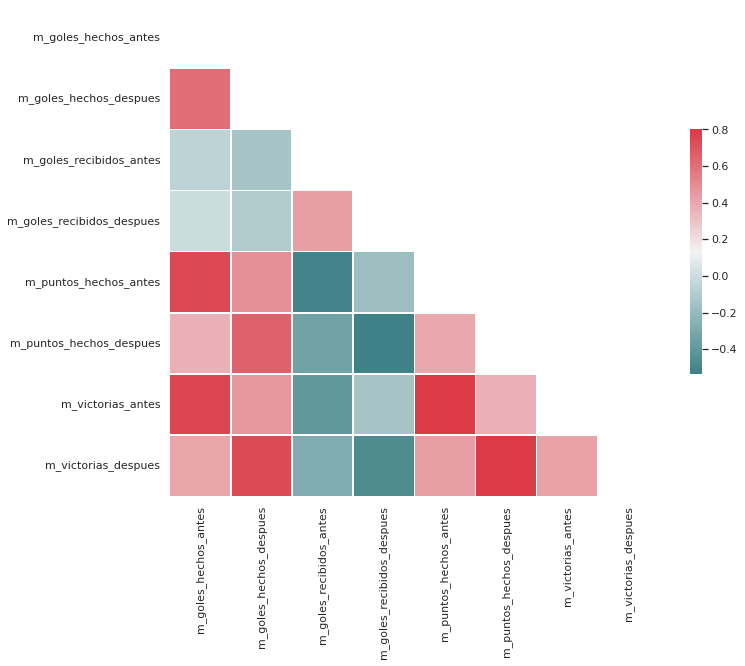

In [ ]:
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html
R = corrcoef(df_medias_transpose)

# http://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
# Generate a mask for the upper triangle
sns.set(style="white")
mask = np.zeros_like(R, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(R, mask=mask, cmap=cmap, vmax=.8,
            square=True, xticklabels=names, yticklabels=names,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

Generar tabla de datos estadísticos básicos.

In [ ]:
desc=df_medias.describe()
desc

,m_goles_hechos_antes,m_goles_hechos_despues,m_goles_recibidos_antes,m_goles_recibidos_despues,m_puntos_hechos_antes,m_puntos_hechos_despues,m_victorias_antes,m_victorias_despues
count,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000
mean,1.145685,1.167403,1.798520,1.622414,4.848297,5.124697,0.246331,0.277790
std,0.375612,0.380167,0.455367,0.609558,1.765716,1.854500,0.120143,0.135273
min,0.000000,0.066667,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.930833,0.946312,1.529241,1.348077,3.942708,4.000000,0.189167,0.200000
50%,1.106971,1.133333,1.745747,1.527500,4.787594,5.116554,0.233333,0.272174
75%,1.303947,1.377187,1.960833,1.800000,5.725455,6.088406,0.300000,0.345698
max,2.700000,2.600000,4.200000,9.000000,12.000000,13.000000,0.800000,1.000000


**Regresion Lineal 1**

Varaibles independiente: m_goles_hechos_antes

Variable depentiente: m_goles_hechos_despues

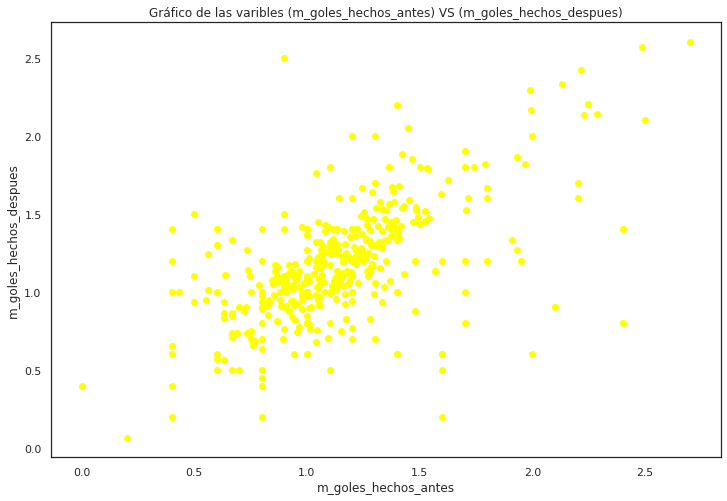

In [ ]:
plt.scatter(df_medias.m_goles_hechos_antes, df_medias.m_goles_hechos_despues, color ='yellow')
plt.xlabel('m_goles_hechos_antes')
plt.ylabel('m_goles_hechos_despues')
plt.title("Gráfico de las varibles (m_goles_hechos_antes) VS (m_goles_hechos_despues)")
plt.show()

Boxplot para ver outliers

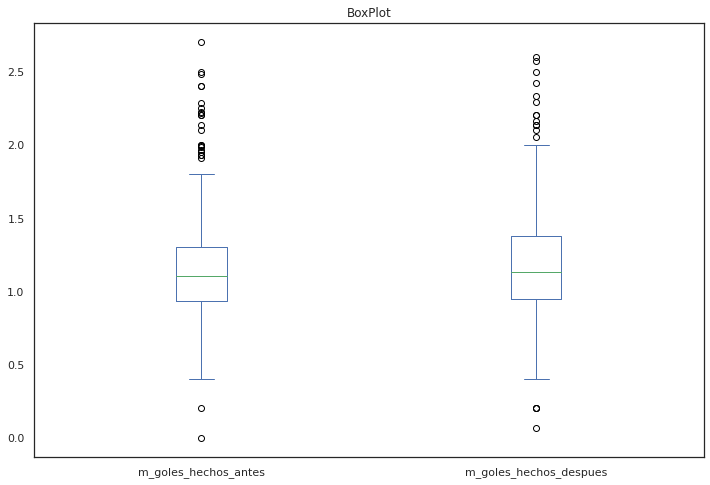

In [ ]:
df_medias.plot(kind='box',y=['m_goles_hechos_antes','m_goles_hechos_despues'],title="BoxPlot")

Cálculo de bigotes superior e inferior de las variables a utilizar en la regresión lineal.

El calculo del bigote inferior es Q1-1.5*Rango_intercuartilico
EL calculo del bigote superior es Q3+1.5*Rango_intercuartilico

In [ ]:
#m_goles_hechos_antes
#bigote inferior
m_goles_hechos_antes_i=desc['m_goles_hechos_antes'][4] - 1.5 * (desc['m_goles_hechos_antes'][6]-desc['m_goles_hechos_antes'][4])
#bigote superior
m_goles_hechos_antes_s=desc['m_goles_hechos_antes'][6] + 1.5 * (desc['m_goles_hechos_antes'][6]-desc['m_goles_hechos_antes'][4])

#m_goles_hechos_despues
#bigote inferior
m_goles_hechos_despues_i=desc['m_goles_hechos_despues'][4] - 1.5 * (desc['m_goles_hechos_despues'][6]-desc['m_goles_hechos_despues'][4])
#bigote superior
m_goles_hechos_despues_s=desc['m_goles_hechos_despues'][6] + 1.5 * (desc['m_goles_hechos_despues'][6]-desc['m_goles_hechos_despues'][4])

print('m_goles_hechos_antes_i')
print(m_goles_hechos_antes_i)
print("m_goles_hechos_antes_s")
print(m_goles_hechos_antes_s)
print("m_goles_hechos_despues_i")
print(m_goles_hechos_despues_i)
print("m_goles_hechos_despues_s")
print(m_goles_hechos_despues_s)

m_goles_hechos_antes_i
0.3711622807017544
m_goles_hechos_antes_s
1.8636184210526316
m_goles_hechos_despues_i
0.2999985923423426
m_goles_hechos_despues_s
2.023500844594594


Eliminación de Outliers utilizando los bigotes superior e inferior calculados.

In [ ]:
df_medias_outlier_1 = df_medias[(df_medias['m_goles_hechos_antes']<m_goles_hechos_antes_s) & (df_medias['m_goles_hechos_antes']>m_goles_hechos_antes_i) & (df_medias['m_goles_hechos_despues']<m_goles_hechos_despues_s) & (df_medias['m_goles_hechos_despues']>m_goles_hechos_despues_i)]

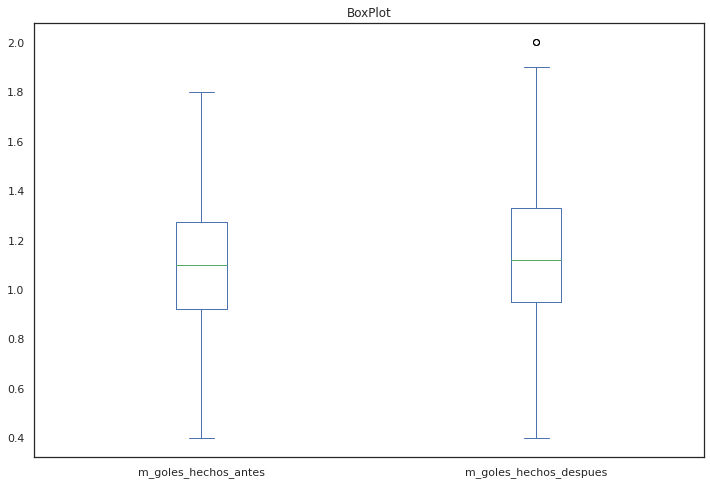

In [ ]:
df_medias_outlier_1.plot(kind='box',y=['m_goles_hechos_antes','m_goles_hechos_despues'],title="BoxPlot")

Selección de varaible independiente y dependiente.

In [ ]:
selected_features = ['m_goles_hechos_antes']#, 'm_goles_recibidos_antes','m_puntos_hechos_antes', 'm_victorias_antes']
selected_variable = 'm_goles_hechos_despues'

Separar en train y test

In [ ]:
p_train = 0.80 # Porcentaje de train.

entreno = df_medias_outlier_1[:int((len(df_medias_outlier_1))*p_train)]
testeo = df_medias_outlier_1[int((len(df_medias_outlier_1))*p_train):]

print("Ejemplos usados para entrenar: ", len(entreno))
print("Ejemplos usados para test: ", len(testeo))

Ejemplos usados para entrenar:  304
Ejemplos usados para test:  76


Construcción  preliminar del modelo

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()
entre_x = np.asanyarray(entreno[['m_goles_hechos_antes']])
entre_y = np.asanyarray(entreno[['m_goles_hechos_despues']])
model.fit(entre_x, entre_y)

LinearRegression()

Coeficientes

In [ ]:
#print(selected_features)
#print('Coefientes: ', model.coef_)
print ('Coeficientes')
pd.DataFrame({'Nombre Variable': (selected_features) ,
              'Coefientes': model.coef_[0]})

Coeficientes


,Nombre Variable,Coefientes
0,m_goles_hechos_antes,0.578301


In [ ]:
print('Interseccion', model.intercept_)

Interseccion [0.51694431]


Probar modelo en testeo

In [ ]:
x_test=np.asanyarray(testeo[selected_features])

In [ ]:
y_pred = model.predict(x_test)

Metricas de error

In [ ]:
#MSE
from sklearn.metrics import mean_squared_error
mean_squared_error = mean_squared_error(testeo[selected_variable], y_pred)
print ('mean_squared_error', mean_squared_error)

mean_squared_error 0.0666127016895087


In [ ]:
#MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error = mean_absolute_error(testeo[selected_variable], y_pred)
print ('mean_absolute_error', mean_absolute_error)

mean_absolute_error 0.19428724391284072


In [ ]:
#R2
from sklearn.metrics import r2_score
R2 = r2_score(testeo[selected_variable], y_pred)
print ('R2', R2)

R2 0.16927667177125516


Grafica de la variable independiente vs la varaiable dependiente y la regresión lineal generada.

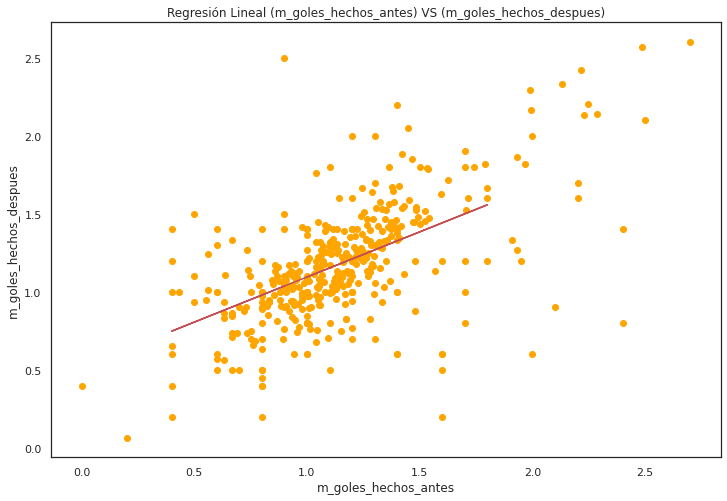

In [ ]:
plt.scatter(df_medias.m_goles_hechos_antes, df_medias.m_goles_hechos_despues, color='orange')#mostramos los datos
plt.plot(entre_x, model.coef_[0][0]*entre_x + model.intercept_[0],'-r')#Trazamos la linea
plt.title("Regresión Lineal (m_goles_hechos_antes) VS (m_goles_hechos_despues)")
plt.xlabel('m_goles_hechos_antes')
plt.ylabel('m_goles_hechos_despues')
plt.show()

Regresion Lineal 2 \
Varaibles independiente: m_goles_hechos_antes \
Variable depentiente: m_goles_hechos_despues

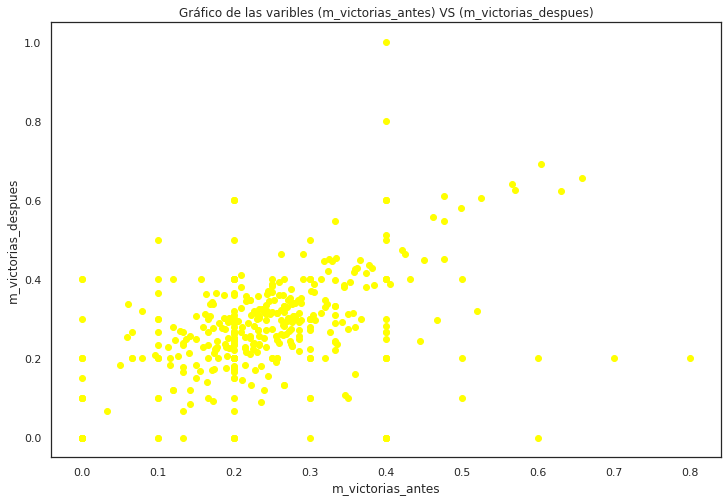

In [ ]:
plt.scatter(df_medias.m_victorias_antes, df_medias.m_victorias_despues, color ='yellow')
plt.title("Gráfico de las varibles (m_victorias_antes) VS (m_victorias_despues)")
plt.xlabel('m_victorias_antes')
plt.ylabel('m_victorias_despues')
plt.show()

Boxplot para ver outliers

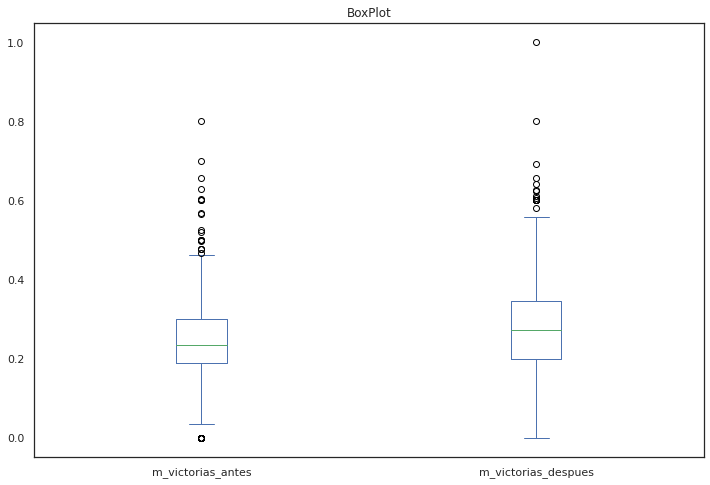

In [ ]:
df_medias.plot(kind='box',y=['m_victorias_antes','m_victorias_despues'],title="BoxPlot")

Cálculo de bigotes superior e inferior de las variables a utilizar en la regresión lineal.

In [ ]:
#m_victorias_antes
#bigote inferior
m_victorias_antes_i=desc['m_victorias_antes'][4] - 1.5 * (desc['m_victorias_antes'][6]-desc['m_victorias_antes'][4])
#bigote inferior
m_victorias_antes_s=desc['m_victorias_antes'][6] + 1.5 * (desc['m_victorias_antes'][6]-desc['m_victorias_antes'][4])

#m_victorias_despues
#bigote inferior
m_victorias_despues_i=desc['m_victorias_despues'][4] - 1.5 * (desc['m_victorias_despues'][6]-desc['m_victorias_despues'][4])
#bigote inferior
m_victorias_despues_s=desc['m_victorias_despues'][6] + 1.5 * (desc['m_victorias_despues'][6]-desc['m_victorias_despues'][4])

print('m_victorias_antes_i')
print(m_victorias_antes_i)
print("m_victorias_antes_s")
print(m_victorias_antes_s)
print("m_victorias_despues_i")
print(m_victorias_despues_i)
print("m_victorias_despues_s")
print(m_victorias_despues_s)

m_victorias_antes_i
0.022916666666666696
m_victorias_antes_s
0.46625000000000005
m_victorias_despues_i
-0.018546875000000046
m_victorias_despues_s
0.5642447916666667


Eliminación de Outliers utilizando los bigotes superior e inferior calculados.

In [ ]:
df_medias_outlier_2 = df_medias[(df_medias['m_victorias_antes']<m_victorias_antes_s) & (df_medias['m_victorias_antes']>m_victorias_antes_i) & (df_medias['m_victorias_despues']<m_victorias_despues_s) & (df_medias['m_victorias_despues']>m_victorias_despues_i) ]

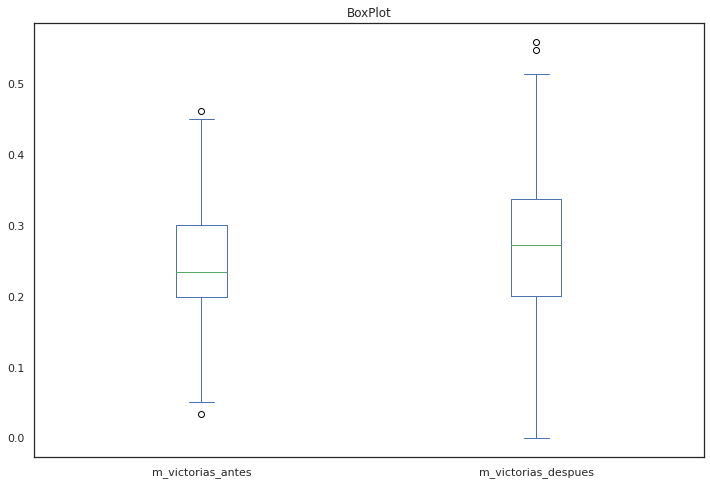

In [ ]:
df_medias_outlier_2.plot(kind='box',y=['m_victorias_antes','m_victorias_despues'],title="BoxPlot")

In [ ]:
selected_features = ['m_victorias_antes']#, 'm_goles_recibidos_antes','m_puntos_hechos_antes', 'm_victorias_antes']
selected_variable = 'm_victorias_despues'

Separar en train y test

In [ ]:
p_train = 0.80 # Porcentaje de train.

entreno = df_medias_outlier_2[:int((len(df_medias_outlier_2))*p_train)]
testeo = df_medias_outlier_2[int((len(df_medias_outlier_2))*p_train):]

print("Ejemplos usados para entrenar: ", len(entreno))
print("Ejemplos usados para test: ", len(testeo))

Ejemplos usados para entrenar:  291
Ejemplos usados para test:  73


Construcción  preliminar del modelo

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()
entre_x = np.asanyarray(entreno[['m_victorias_antes']])
entre_y = np.asanyarray(entreno[['m_victorias_despues']])
model.fit(entre_x, entre_y)

LinearRegression()

Coeficientes

In [ ]:
#print(selected_features)
#print('Coefientes: ', model.coef_)
print ('Coeficientes')
pd.DataFrame({'Nombre Variable': (selected_features) ,
              'Coefientes': model.coef_[0]})

Coeficientes


,Nombre Variable,Coefientes
0,m_victorias_antes,0.366893


In [ ]:
print('Interseccion', model.intercept_)

Interseccion [0.18628805]


Probar modelo en testeo

In [ ]:
x_test=np.asanyarray(testeo[selected_features])

In [ ]:
y_pred = model.predict(x_test)

Metricas de error

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error = mean_squared_error(testeo[selected_variable], y_pred)
print ('mean_squared_error', mean_squared_error)

mean_squared_error 0.010337864917810045


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error = mean_absolute_error(testeo[selected_variable], y_pred)
print ('mean_absolute_error', mean_absolute_error)

mean_absolute_error 0.07615933839033984


In [ ]:
from sklearn.metrics import r2_score
R2 = r2_score(testeo[selected_variable], y_pred)
print ('R2', R2)

R2 0.028975382467900768


Grafica de la variable independiente vs la varaiable dependiente y la regresión lineal generada.

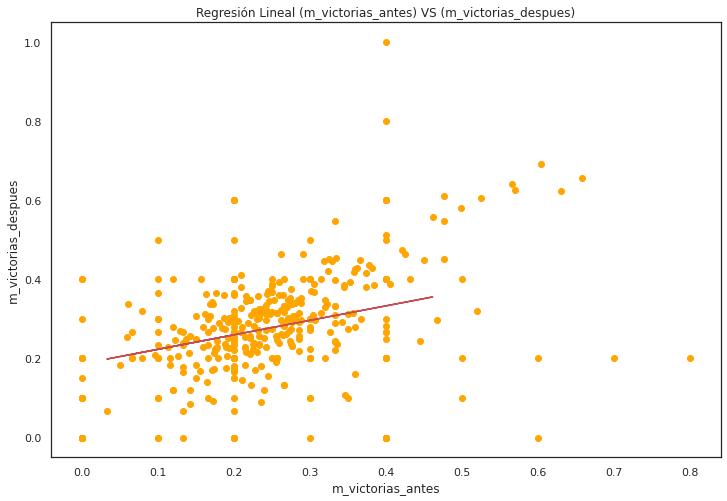

In [ ]:
plt.scatter(df_medias.m_victorias_antes, df_medias.m_victorias_despues, color='orange')#mostramos los datos
plt.plot(entre_x, model.coef_[0][0]*entre_x + model.intercept_[0],'-r')#Trazamos la linea
plt.title("Regresión Lineal (m_victorias_antes) VS (m_victorias_despues)")
plt.xlabel('m_victorias_antes')
plt.ylabel('m_victorias_despues')
plt.show()

Regresion Lineal 3 \
Varaibles independiente: m_goles_recibidos_antes \
Variable depentiente: m_goles_recibidos_despues

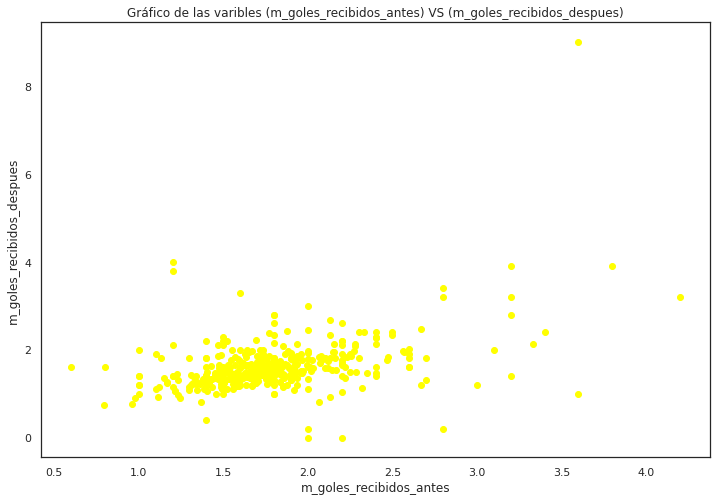

In [ ]:
plt.scatter(df_medias.m_goles_recibidos_antes, df_medias.m_goles_recibidos_despues, color ='yellow')
plt.title("Gráfico de las varibles (m_goles_recibidos_antes) VS (m_goles_recibidos_despues)")
plt.xlabel('m_goles_recibidos_antes')
plt.ylabel('m_goles_recibidos_despues')
plt.show()

Boxplot para ver outliers

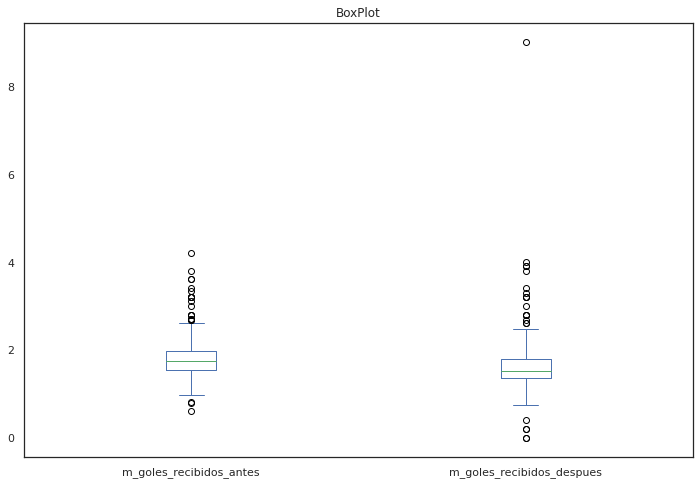

In [ ]:
df_medias.plot(kind='box',y=['m_goles_recibidos_antes','m_goles_recibidos_despues'],title="BoxPlot")

Cálculo de bigotes superior e inferior de las variables a utilizar en la regresión lineal.

In [ ]:
#m_victorias_antes
#bigote inferior
m_goles_recibidos_antes_i=desc['m_goles_recibidos_antes'][4] - 1.5 * (desc['m_goles_recibidos_antes'][6]-desc['m_goles_recibidos_antes'][4])
#bigote inferior
m_goles_recibidos_antes_s=desc['m_goles_recibidos_antes'][6] + 1.5 * (desc['m_goles_recibidos_antes'][6]-desc['m_goles_recibidos_antes'][4])

#m_victorias_despues
#bigote inferior
m_goles_recibidos_despues_i=desc['m_goles_recibidos_despues'][4] - 1.5 * (desc['m_goles_recibidos_despues'][6]-desc['m_goles_recibidos_despues'][4])
#bigote inferior
m_goles_recibidos_despues_s=desc['m_goles_recibidos_despues'][6] + 1.5 * (desc['m_goles_recibidos_despues'][6]-desc['m_goles_recibidos_despues'][4])

print('m_goles_recibidos_antes_i')
print(m_goles_recibidos_antes_i)
print("m_goles_recibidos_antes_s")
print(m_goles_recibidos_antes_s)
print("m_goles_recibidos_despues_i")
print(m_goles_recibidos_despues_i)
print("m_goles_recibidos_despues_s")
print(m_goles_recibidos_despues_s)

m_goles_recibidos_antes_i
0.8818526785714291
m_goles_recibidos_antes_s
2.6082217261904757
m_goles_recibidos_despues_i
0.6701923076923079
m_goles_recibidos_despues_s
2.4778846153846152


Eliminación de Outliers utilizando los bigotes superior e inferior calculados.


In [ ]:
df_medias_outlier_3 = df_medias[(df_medias['m_goles_recibidos_antes']<m_goles_recibidos_antes_s) & (df_medias['m_goles_recibidos_antes']>m_goles_recibidos_antes_i) & (df_medias['m_goles_recibidos_despues']<m_goles_recibidos_despues_s) & (df_medias['m_goles_recibidos_despues']>m_goles_recibidos_despues_i)]

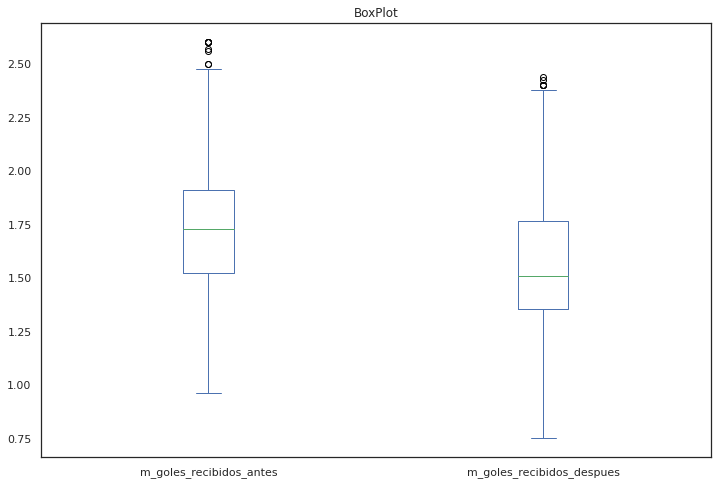

In [ ]:
df_medias_outlier_3.plot(kind='box',y=['m_goles_recibidos_antes','m_goles_recibidos_despues'],title="BoxPlot")

In [ ]:
selected_features = ['m_goles_recibidos_antes']#, 'm_goles_recibidos_antes','m_puntos_hechos_antes', 'm_victorias_antes']
selected_variable = 'm_goles_recibidos_despues'

Separar en train y test

In [ ]:
p_train = 0.80 # Porcentaje de train.

entreno = df_medias_outlier_3[:int((len(df_medias_outlier_3))*p_train)]
testeo = df_medias_outlier_3[int((len(df_medias_outlier_3))*p_train):]

print("Ejemplos usados para entrenar: ", len(entreno))
print("Ejemplos usados para test: ", len(testeo))

Ejemplos usados para entrenar:  300
Ejemplos usados para test:  75


Construcción  preliminar del modelo

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()
entre_x = np.asanyarray(entreno[['m_goles_recibidos_antes']])
entre_y = np.asanyarray(entreno[['m_goles_recibidos_despues']])
model.fit(entre_x, entre_y)


LinearRegression()

 Coeficientes

In [ ]:
#print(selected_features)
#print('Coefientes: ', model.coef_)
print ('Coeficientes')
pd.DataFrame({'Nombre Variable': (selected_features) ,
              'Coefientes': model.coef_[0]})

Coeficientes


,Nombre Variable,Coefientes
0,m_goles_recibidos_antes,0.438593


In [ ]:
print('Interseccion', model.intercept_)

Interseccion [0.80121463]


Probar modelo en testeo

In [ ]:
x_test=np.asanyarray(testeo[selected_features])

In [ ]:
y_pred = model.predict(x_test)

Metricas de error

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error = mean_squared_error(testeo[selected_variable], y_pred)
print ('mean_squared_error', mean_squared_error)

mean_squared_error 0.07605223886549228


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error = mean_absolute_error(testeo[selected_variable], y_pred)
print ('mean_absolute_error', mean_absolute_error)

mean_absolute_error 0.21467463110548404


In [ ]:
from sklearn.metrics import r2_score
R2 = r2_score(testeo[selected_variable], y_pred)
print ('R2', R2)

R2 0.2495253076226851


Grafica de la variable independiente vs la varaiable dependiente y la regresión lineal generada

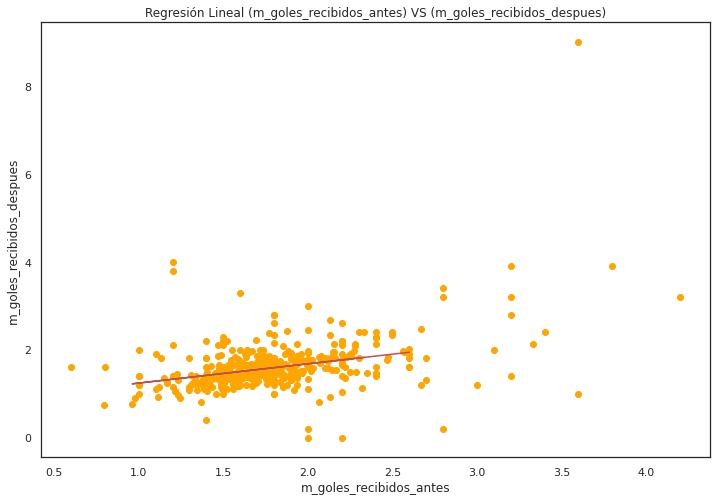

In [ ]:
plt.scatter(df_medias.m_goles_recibidos_antes, df_medias.m_goles_recibidos_despues, color='orange')#mostramos los datos
plt.plot(entre_x, model.coef_[0][0]*entre_x + model.intercept_[0],'-r')#Trazamos la linea
plt.title("Regresión Lineal (m_goles_recibidos_antes) VS (m_goles_recibidos_despues)")
plt.xlabel('m_goles_recibidos_antes')
plt.ylabel('m_goles_recibidos_despues')
plt.show()

Regresion Lineal 4 \
Varaibles independiente: m_puntos_hechos_antes \
Variable depentiente: m_puntos_hechos_despues

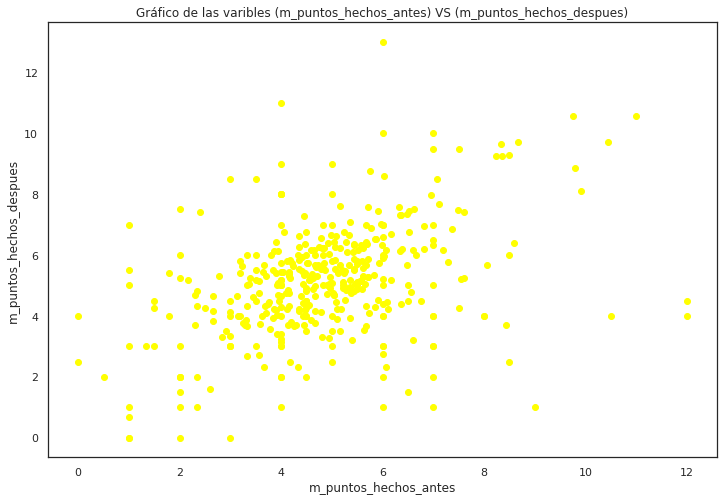

In [ ]:
plt.scatter(df_medias.m_puntos_hechos_antes, df_medias.m_puntos_hechos_despues, color ='yellow')
plt.title("Gráfico de las varibles (m_puntos_hechos_antes) VS (m_puntos_hechos_despues)")
plt.xlabel('m_puntos_hechos_antes')
plt.ylabel('m_puntos_hechos_despues')
plt.show()

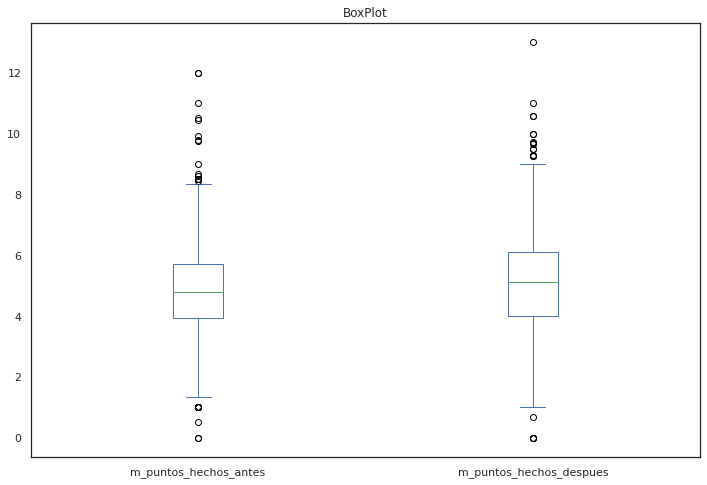

In [ ]:
df_medias.plot(kind='box',y=['m_puntos_hechos_antes','m_puntos_hechos_despues'],title="BoxPlot")

Cálculo de bigotes superior e inferior de las variables a utilizar en la regresión lineal.

In [ ]:
#m_victorias_antes
#bigote inferior
m_puntos_hechos_antes_i=desc['m_puntos_hechos_antes'][4] - 1.5 * (desc['m_puntos_hechos_antes'][6]-desc['m_puntos_hechos_antes'][4])
#bigote inferior
m_puntos_hechos_antes_s=desc['m_puntos_hechos_antes'][6] + 1.5 * (desc['m_puntos_hechos_antes'][6]-desc['m_puntos_hechos_antes'][4])

#m_victorias_despues
#bigote inferior
m_puntos_hechos_despues_i=desc['m_puntos_hechos_despues'][4] - 1.5 * (desc['m_puntos_hechos_despues'][6]-desc['m_puntos_hechos_despues'][4])
#bigote inferior
m_puntos_hechos_despues_s=desc['m_puntos_hechos_despues'][6] + 1.5 * (desc['m_puntos_hechos_despues'][6]-desc['m_puntos_hechos_despues'][4])

print('m_puntos_hechos_antes_i')
print(m_puntos_hechos_antes_i)
print("m_puntos_hechos_antes_s")
print(m_puntos_hechos_antes_s)
print("m_puntos_hechos_despues_i")
print(m_puntos_hechos_despues_i)
print("m_puntos_hechos_despues_s")
print(m_puntos_hechos_despues_s)

m_puntos_hechos_antes_i
1.2685890151515156
m_puntos_hechos_antes_s
8.399573863636363
m_puntos_hechos_despues_i
0.8673913043478256
m_puntos_hechos_despues_s
9.221014492753625


Eliminación de Outliers utilizando los bigotes superior e inferior calculados.

In [ ]:
df_medias_outlier_4 = df_medias[(df_medias['m_puntos_hechos_antes']<m_puntos_hechos_antes_s) & (df_medias['m_puntos_hechos_antes']>m_puntos_hechos_antes_i) & (df_medias['m_puntos_hechos_despues']<m_puntos_hechos_despues_s) & (df_medias['m_puntos_hechos_despues']>m_puntos_hechos_despues_i)]

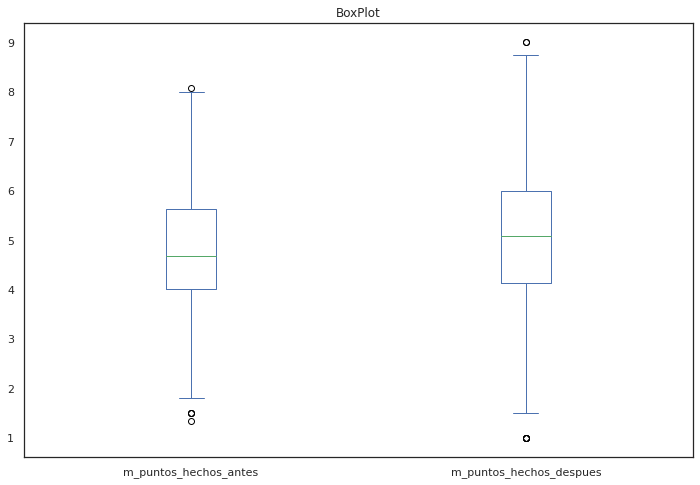

In [ ]:
df_medias_outlier_4.plot(kind='box',y=['m_puntos_hechos_antes','m_puntos_hechos_despues'],title="BoxPlot")

In [ ]:
selected_features = ['m_puntos_hechos_antes']#, 'm_goles_recibidos_antes','m_puntos_hechos_antes', 'm_victorias_antes']
selected_variable = 'm_puntos_hechos_despues'

Separar en train y test

In [ ]:
p_train = 0.80 # Porcentaje de train.

entreno = df_medias_outlier_4[:int((len(df_medias_outlier_4))*p_train)]
testeo = df_medias_outlier_4[int((len(df_medias_outlier_4))*p_train):]

print("Ejemplos usados para entrenar: ", len(entreno))
print("Ejemplos usados para test: ", len(testeo))

Ejemplos usados para entrenar:  298
Ejemplos usados para test:  75


Construcción  preliminar del modelo

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()
entre_x = np.asanyarray(entreno[['m_puntos_hechos_antes']])
entre_y = np.asanyarray(entreno[['m_puntos_hechos_despues']])
model.fit(entre_x, entre_y)

LinearRegression()

Coeficientes

In [ ]:
#print(selected_features)
#print('Coefientes: ', model.coef_)
print ('Coeficientes')
pd.DataFrame({'Nombre Variable': (selected_features) ,
              'Coefientes': model.coef_[0]})

Coeficientes


,Nombre Variable,Coefientes
0,m_puntos_hechos_antes,0.301747


In [ ]:
print('Interseccion', model.intercept_)

Interseccion [3.66170996]


Probar modelo en testeo

In [ ]:
x_test=np.asanyarray(testeo[selected_features])

In [ ]:
y_pred = model.predict(x_test)

Metricas de error

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error = mean_squared_error(testeo[selected_variable], y_pred)
print ('mean_squared_error', mean_squared_error)

mean_squared_error 2.194854903960308


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error = mean_absolute_error(testeo[selected_variable], y_pred)
print ('mean_absolute_error', mean_absolute_error)

mean_absolute_error 1.1395635126580161


In [ ]:
from sklearn.metrics import r2_score
R2 = r2_score(testeo[selected_variable], y_pred)
print ('R2', R2)

R2 0.08949840185861069


Grafica de la variable independiente vs la varaiable dependiente y la regresión lineal generada.

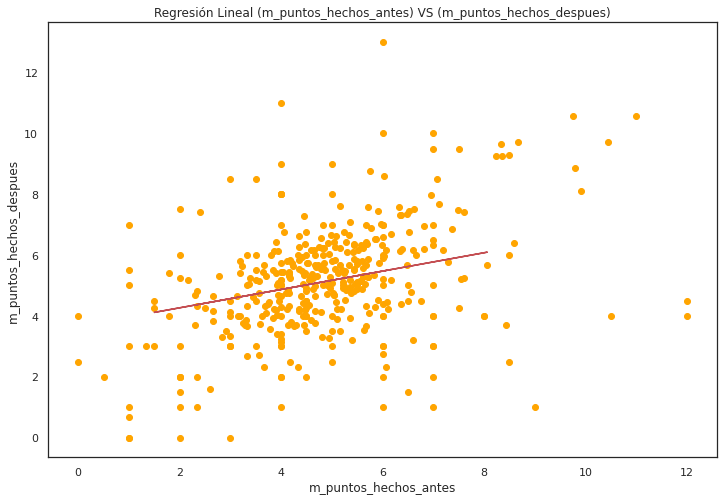

In [ ]:
#plt.scatter(df_medias.m_puntos_hechos_antes, df_medias.m_puntos_hechos_despues, color='orange')#mostramos los datos
plt.scatter(df_medias.m_puntos_hechos_antes, df_medias.m_puntos_hechos_despues, color='orange')#mostramos los datos
plt.plot(entre_x, model.coef_[0][0]*entre_x + model.intercept_[0],'-r')#Trazamos la linea
plt.title("Regresión Lineal (m_puntos_hechos_antes) VS (m_puntos_hechos_despues)")
plt.xlabel('m_puntos_hechos_antes')
plt.ylabel('m_puntos_hechos_despues')
plt.show()

#**Regresion Lineal Ligas Latinoaméricanas Masculinas**

In [ ]:
latinoamerica.reset_index(drop = True, inplace = True) # reiniciar index

**Transformación de Dataframe (Latinoamerica)**

Se transforma el Dataframe acumulando el promedio por equipo de las siguientes variables:
-	promedio_goles_hechos_antes_de_cambio_entrenador_1_5
-	promedio_goles_hechos_despues_de_cambio_entrenador_1_5
-	promedio_goles_recibidos_antes_de_cambio_entrenador_1_5
-	promedio_goles_recibidos_despues_de_cambio_entrenador_1_5
-	puntos_hechos_antes_de_cambio_entrenador_1_5
-	puntos_hechos_despues_de_cambio_entrenador_1_5
-	porcentaje_victorias_antes_de_cambio_entrenador_1_5
-	porcentaje_victorias_despues_de_cambio_entrenador_1_5

Cada nueva estancia del Dataset transformado representa un club de fútbol.

In [ ]:
equipos_latinoamerica=pd.unique(latinoamerica['equipo'])

In [ ]:
equipo_lista = []
m_goles_hechos_antes = []
m_goles_hechos_despues = []
m_goles_recibidos_antes = []
m_goles_recibidos_despues = []
m_puntos_hechos_antes = []
m_puntos_hechos_despues = []
m_victorias_antes = []
m_victorias_despues = []

for equipo in equipos_latinoamerica:
  equipo_actual = latinoamerica[latinoamerica['equipo']==equipo]
  equipo_actual_estadistica = equipo_actual.describe()

  equipo_lista.append(equipo)
  m_goles_hechos_antes.append(equipo_actual_estadistica['promedio_goles_hechos_antes_de_cambio_entrenador_1_5'][1])
  m_goles_hechos_despues.append(equipo_actual_estadistica['promedio_goles_hechos_despues_de_cambio_entrenador_1_5'][1])
  m_goles_recibidos_antes.append(equipo_actual_estadistica['promedio_goles_recibidos_antes_de_cambio_entrenador_1_5'][1])
  m_goles_recibidos_despues.append(equipo_actual_estadistica['promedio_goles_recibidos_despues_de_cambio_entrenador_1_5'][1])
  m_puntos_hechos_antes.append(equipo_actual_estadistica['puntos_hechos_antes_de_cambio_entrenador_1_5'][1])
  m_puntos_hechos_despues.append(equipo_actual_estadistica['puntos_hechos_despues_de_cambio_entrenador_1_5'][1])
  m_victorias_antes.append(equipo_actual_estadistica['porcentaje_victorias_antes_de_cambio_entrenador_1_5'][1])
  m_victorias_despues.append(equipo_actual_estadistica['porcentaje_victorias_despues_de_cambio_entrenador_1_5'][1])

df_medias_latinoamerica = pd.DataFrame({'equipo':equipo_lista,
                                  'm_goles_hechos_antes':m_goles_hechos_antes,
                                  'm_goles_hechos_despues':m_goles_hechos_despues,
                                  'm_goles_recibidos_antes':m_goles_recibidos_antes,
                                  'm_goles_recibidos_despues':m_goles_recibidos_despues,
                                  'm_puntos_hechos_antes':m_puntos_hechos_antes,
                                  'm_puntos_hechos_despues':m_puntos_hechos_despues,
                                  'm_victorias_antes':m_victorias_antes,
                                  'm_victorias_despues':m_victorias_despues
                                  })

In [ ]:
df_medias_latinoamerica

,equipo,m_goles_hechos_antes,m_goles_hechos_despues,m_goles_recibidos_antes,m_goles_recibidos_despues,m_puntos_hechos_antes,m_puntos_hechos_despues,m_victorias_antes,m_victorias_despues
0,Once Caldas,1.235294,1.341176,1.411765,1.235294,5.411765,6.705882,0.270588,0.341176
1,Santa Fe,0.980952,1.322222,1.038095,1.038095,6.142857,5.904762,0.295238,0.374603
2,Alianza Petrolera,0.770370,1.000000,1.925926,1.555556,2.777778,5.111111,0.103704,0.244444
3,Atlético Nacional,1.250000,1.466667,1.050000,0.883333,7.916667,8.833333,0.433333,0.500000
4,Envigado FC,1.000000,1.181818,1.527273,1.327273,4.363636,6.272727,0.181818,0.309091
...,...,...,...,...,...,...,...,...,...
118,Ferro Carril Oeste,1.400000,0.733333,1.800000,1.400000,6.000000,4.666667,0.266667,0.266667
119,Deportivo Español,1.400000,1.600000,1.600000,1.600000,4.000000,6.000000,0.000000,0.200000
120,Gimnasia y Tiro de Salta,0.800000,1.000000,1.000000,0.800000,7.000000,8.000000,0.400000,0.400000
121,Deportivo Mandiyú,4.000000,0.400000,4.000000,0.400000,6.000000,8.000000,0.400000,0.400000


Porcentaje de datos perdidos en el Dataset.

In [ ]:
for col in df_medias_latinoamerica.columns:
    pct_missing = np.mean(df_medias_latinoamerica[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

equipo - 0%
m_goles_hechos_antes - 0%
m_goles_hechos_despues - 0%
m_goles_recibidos_antes - 0%
m_goles_recibidos_despues - 0%
m_puntos_hechos_antes - 0%
m_puntos_hechos_despues - 0%
m_victorias_antes - 0%
m_victorias_despues - 0%


In [ ]:
df_medias_latinoamerica.dtypes

equipo                        object
m_goles_hechos_antes         float64
m_goles_hechos_despues       float64
m_goles_recibidos_antes      float64
m_goles_recibidos_despues    float64
m_puntos_hechos_antes        float64
m_puntos_hechos_despues      float64
m_victorias_antes            float64
m_victorias_despues          float64
dtype: object

Varaibles no numericas

In [ ]:
df_numeric = df_medias_latinoamerica.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['m_goles_hechos_antes' 'm_goles_hechos_despues' 'm_goles_recibidos_antes'
 'm_goles_recibidos_despues' 'm_puntos_hechos_antes'
 'm_puntos_hechos_despues' 'm_victorias_antes' 'm_victorias_despues']


Trasponer Dataset

In [ ]:
df_medias_latinoamerica_transpose = transpose(df_medias_latinoamerica[numeric_cols])

In [ ]:
names =  df_medias_latinoamerica_transpose.index
names

Index(['m_goles_hechos_antes', 'm_goles_hechos_despues',
       'm_goles_recibidos_antes', 'm_goles_recibidos_despues',
       'm_puntos_hechos_antes', 'm_puntos_hechos_despues', 'm_victorias_antes',
       'm_victorias_despues'],
      dtype='object')

Grafico de Correlación de variables.

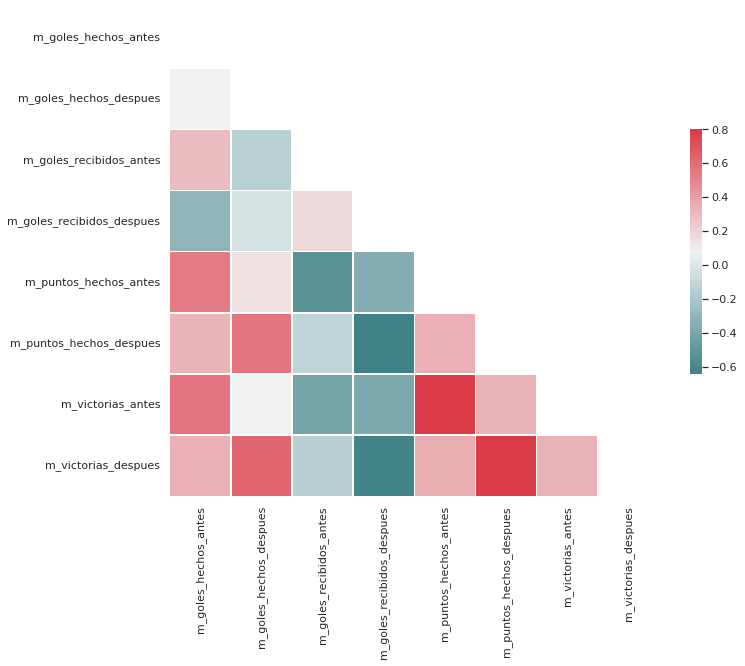

In [ ]:
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html
R = corrcoef(df_medias_latinoamerica_transpose)

# http://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
# Generate a mask for the upper triangle
sns.set(style="white")
mask = np.zeros_like(R, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(R, mask=mask, cmap=cmap, vmax=.8,
            square=True, xticklabels=names, yticklabels=names,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [ ]:
desc_latinoamerica=df_medias_latinoamerica.describe()
desc_latinoamerica

,m_goles_hechos_antes,m_goles_hechos_despues,m_goles_recibidos_antes,m_goles_recibidos_despues,m_puntos_hechos_antes,m_puntos_hechos_despues,m_victorias_antes,m_victorias_despues
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,1.072689,1.079527,1.490356,1.305318,5.170508,5.246452,0.258408,0.291816
std,0.386950,0.289978,0.363008,0.287617,1.609888,1.502786,0.107606,0.110991
min,0.200000,0.200000,0.600000,0.400000,0.000000,1.000000,0.000000,0.000000
25%,0.892857,0.900000,1.286335,1.118788,4.206061,4.431677,0.196970,0.233333
50%,1.032000,1.088235,1.472727,1.311538,5.027778,5.250000,0.250000,0.293333
75%,1.176667,1.258333,1.675962,1.477821,6.000000,6.043478,0.319259,0.361325
max,4.000000,2.200000,4.000000,2.333333,11.000000,9.000000,0.600000,0.685714


Regresion Lineal 1 \
Varaibles independiente: m_goles_hechos_antes \
Variable depentiente: m_goles_hechos_despues

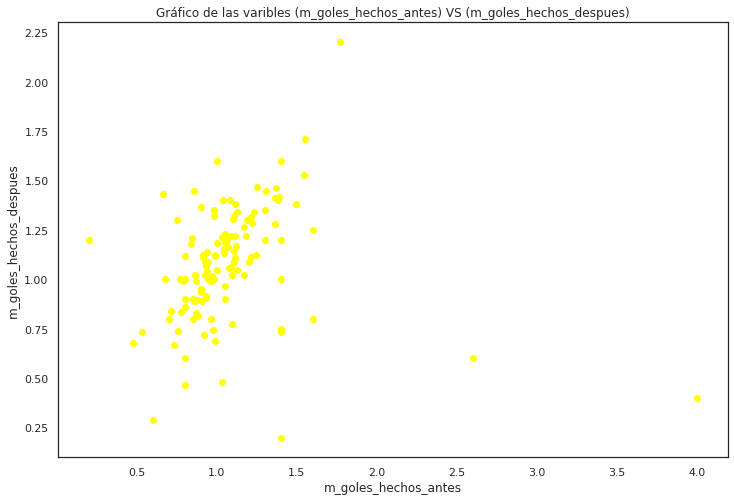

In [ ]:
plt.scatter(df_medias_latinoamerica.m_goles_hechos_antes, df_medias_latinoamerica.m_goles_hechos_despues, color ='yellow')
plt.xlabel('m_goles_hechos_antes')
plt.ylabel('m_goles_hechos_despues')
plt.title("Gráfico de las varibles (m_goles_hechos_antes) VS (m_goles_hechos_despues)")
plt.show()

Boxplot para ver outliers

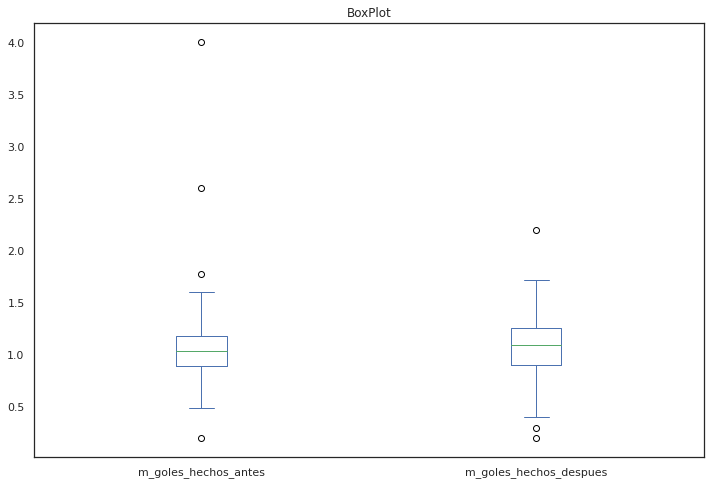

In [ ]:
df_medias_latinoamerica.plot(kind='box',y=['m_goles_hechos_antes','m_goles_hechos_despues'],title="BoxPlot")

Cálculo de bigotes superior e inferior de las variables a utilizar en la regresión lineal.

In [ ]:
#m_goles_hechos_antes
#bigote inferior
m_goles_hechos_antes_i=desc_latinoamerica['m_goles_hechos_antes'][4] - 1.5 * (desc_latinoamerica['m_goles_hechos_antes'][6]-desc_latinoamerica['m_goles_hechos_antes'][4])
#bigote inferior
m_goles_hechos_antes_s=desc_latinoamerica['m_goles_hechos_antes'][6] + 1.5 * (desc_latinoamerica['m_goles_hechos_antes'][6]-desc_latinoamerica['m_goles_hechos_antes'][4])

#m_goles_hechos_despues
#bigote inferior
m_goles_hechos_despues_i=desc_latinoamerica['m_goles_hechos_despues'][4] - 1.5 * (desc_latinoamerica['m_goles_hechos_despues'][6]-desc_latinoamerica['m_goles_hechos_despues'][4])
#bigote inferior
m_goles_hechos_despues_s=desc_latinoamerica['m_goles_hechos_despues'][6] + 1.5 * (desc_latinoamerica['m_goles_hechos_despues'][6]-desc_latinoamerica['m_goles_hechos_despues'][4])

print('m_goles_hechos_antes_i')
print(m_goles_hechos_antes_i)
print("m_goles_hechos_antes_s")
print(m_goles_hechos_antes_s)
print("m_goles_hechos_despues_i")
print(m_goles_hechos_despues_i)
print("m_goles_hechos_despues_s")
print(m_goles_hechos_despues_s)

m_goles_hechos_antes_i
0.46714285714285686
m_goles_hechos_antes_s
1.6023809523809527
m_goles_hechos_despues_i
0.3624999999999998
m_goles_hechos_despues_s
1.7958333333333334


Eliminación de Outliers utilizando los bigotes superior e inferior calculados.

In [ ]:
df_medias_latinoamerica_outlier_1 = df_medias_latinoamerica[(df_medias_latinoamerica['m_goles_hechos_antes']<m_goles_hechos_antes_s) & (df_medias_latinoamerica['m_goles_hechos_antes']>m_goles_hechos_antes_i) & (df_medias_latinoamerica['m_goles_hechos_despues']<m_goles_hechos_despues_s) & (df_medias_latinoamerica['m_goles_hechos_despues']>m_goles_hechos_despues_i)]

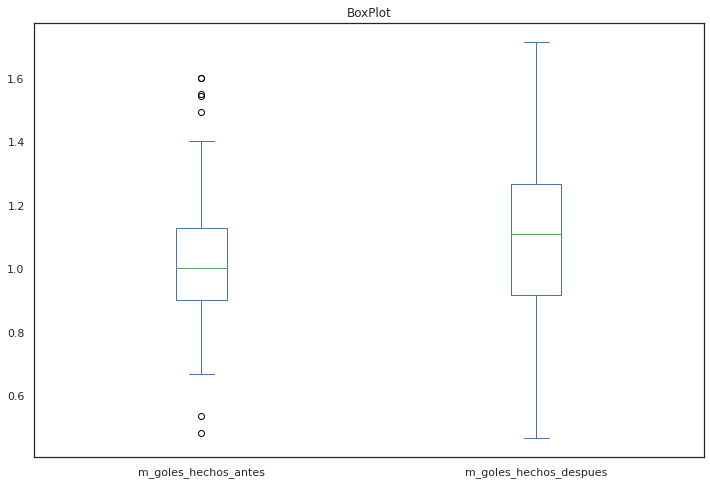

In [ ]:
df_medias_latinoamerica_outlier_1.plot(kind='box',y=['m_goles_hechos_antes','m_goles_hechos_despues'],title="BoxPlot")

In [ ]:
selected_features = ['m_goles_hechos_antes']#, 'm_goles_recibidos_antes','m_puntos_hechos_antes', 'm_victorias_antes']
selected_variable = 'm_goles_hechos_despues'

Separar en train y test

In [ ]:
p_train = 0.80 # Porcentaje de train.

entreno = df_medias_latinoamerica_outlier_1[:int((len(df_medias_latinoamerica_outlier_1))*p_train)]
testeo = df_medias_latinoamerica_outlier_1[int((len(df_medias_latinoamerica_outlier_1))*p_train):]

print("Ejemplos usados para entrenar: ", len(entreno))
print("Ejemplos usados para test: ", len(testeo))

Ejemplos usados para entrenar:  93
Ejemplos usados para test:  24


Construcción  preliminar del modelo

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()
entre_x = np.asanyarray(entreno[['m_goles_hechos_antes']])
entre_y = np.asanyarray(entreno[['m_goles_hechos_despues']])
model.fit(entre_x, entre_y)

LinearRegression()

Coeficientes

In [ ]:
#print(selected_features)
#print('Coefientes: ', model.coef_)
print ('Coeficientes')
pd.DataFrame({'Nombre Variable': (selected_features) ,
              'Coefientes': model.coef_[0]})

Coeficientes


,Nombre Variable,Coefientes
0,m_goles_hechos_antes,0.63101


In [ ]:
print('Interseccion', model.intercept_)

Interseccion [0.43823681]


Probar modelo en testeo

In [ ]:
x_test=np.asanyarray(testeo[selected_features])

In [ ]:
y_pred = model.predict(x_test)

Metricas de error

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error = mean_squared_error(testeo[selected_variable], y_pred)
print ('mean_squared_error', mean_squared_error)

mean_squared_error 0.05496284607931845


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error = mean_absolute_error(testeo[selected_variable], y_pred)
print ('mean_absolute_error', mean_absolute_error)

mean_absolute_error 0.16652526893743355


In [ ]:
from sklearn.metrics import r2_score
R2 = r2_score(testeo[selected_variable], y_pred)
print ('R2', R2)

R2 0.011200111765189535


Grafica de la variable independiente vs la varaiable dependiente y la regresión lineal generada.

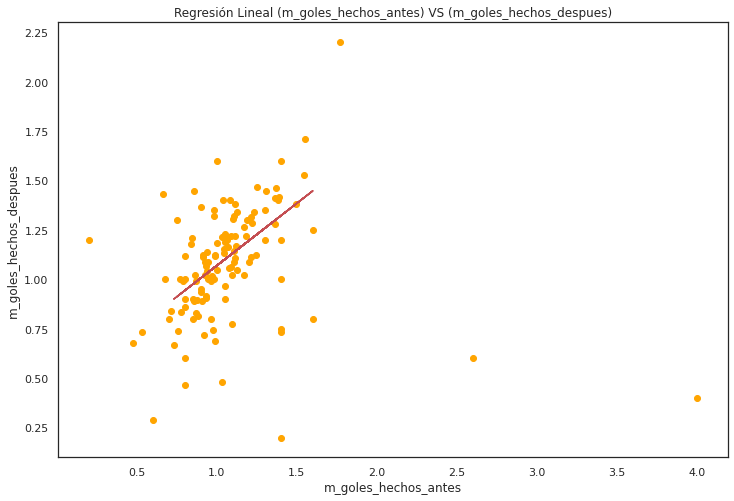

In [ ]:
plt.scatter(df_medias_latinoamerica.m_goles_hechos_antes, df_medias_latinoamerica.m_goles_hechos_despues, color='orange')#mostramos los datos
plt.plot(entre_x, model.coef_[0][0]*entre_x + model.intercept_[0],'-r')#Trazamos la linea
plt.title("Regresión Lineal (m_goles_hechos_antes) VS (m_goles_hechos_despues)")
plt.xlabel('m_goles_hechos_antes')
plt.ylabel('m_goles_hechos_despues')
plt.show()

Regresion Lineal 2 \
Varaibles independiente: m_goles_hechos_antes \
Variable depentiente: m_goles_hechos_despues

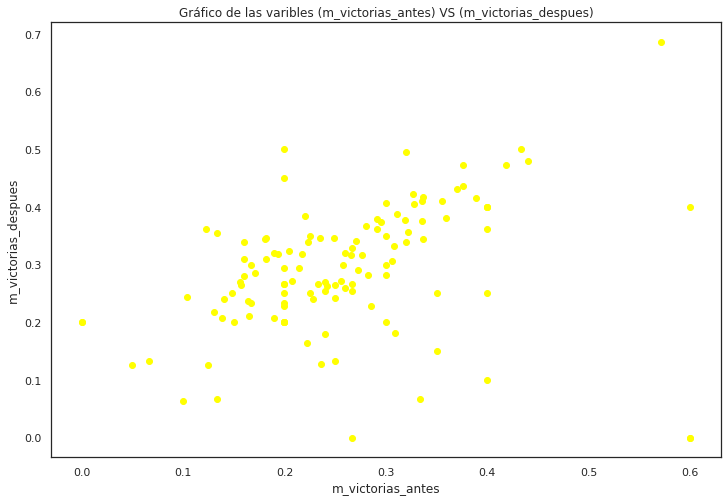

In [ ]:
plt.scatter(df_medias_latinoamerica.m_victorias_antes, df_medias_latinoamerica.m_victorias_despues, color ='yellow')
plt.title("Gráfico de las varibles (m_victorias_antes) VS (m_victorias_despues)")
plt.xlabel('m_victorias_antes')
plt.ylabel('m_victorias_despues')
plt.show()

Boxplot para ver outliers

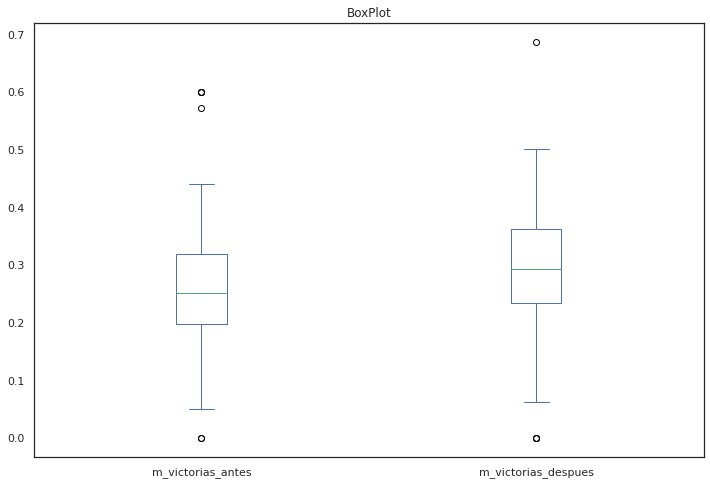

In [ ]:
df_medias_latinoamerica.plot(kind='box',y=['m_victorias_antes','m_victorias_despues'],title="BoxPlot")

Cálculo de bigotes superior e inferior de las variables a utilizar en la regresión lineal.

In [ ]:
#m_victorias_antes
#bigote inferior
m_victorias_antes_i=desc_latinoamerica['m_victorias_antes'][4] - 1.5 * (desc_latinoamerica['m_victorias_antes'][6]-desc_latinoamerica['m_victorias_antes'][4])
#bigote inferior
m_victorias_antes_s=desc_latinoamerica['m_victorias_antes'][6] + 1.5 * (desc_latinoamerica['m_victorias_antes'][6]-desc_latinoamerica['m_victorias_antes'][4])

#m_victorias_despues
#bigote inferior
m_victorias_despues_i=desc_latinoamerica['m_victorias_despues'][4] - 1.5 * (desc_latinoamerica['m_victorias_despues'][6]-desc_latinoamerica['m_victorias_despues'][4])
#bigote inferior
m_victorias_despues_s=desc_latinoamerica['m_victorias_despues'][6] + 1.5 * (desc_latinoamerica['m_victorias_despues'][6]-desc_latinoamerica['m_victorias_despues'][4])

print('m_victorias_antes_i')
print(m_victorias_antes_i)
print("m_victorias_antes_s")
print(m_victorias_antes_s)
print("m_victorias_despues_i")
print(m_victorias_despues_i)
print("m_victorias_despues_s")
print(m_victorias_despues_s)

m_victorias_antes_i
0.01353535353535354
m_victorias_antes_s
0.5026936026936026
m_victorias_despues_i
0.041346153846153866
m_victorias_despues_s
0.5533119658119658


Eliminación de Outliers utilizando los bigotes superior e inferior calculados.

In [ ]:
df_medias_latinoamerica_outlier_2 = df_medias_latinoamerica[(df_medias_latinoamerica['m_victorias_antes']<m_victorias_antes_s) & (df_medias_latinoamerica['m_victorias_antes']>m_victorias_antes_i) & (df_medias_latinoamerica['m_victorias_despues']<m_victorias_despues_s) & (df_medias_latinoamerica['m_victorias_despues']>m_victorias_despues_i) ]

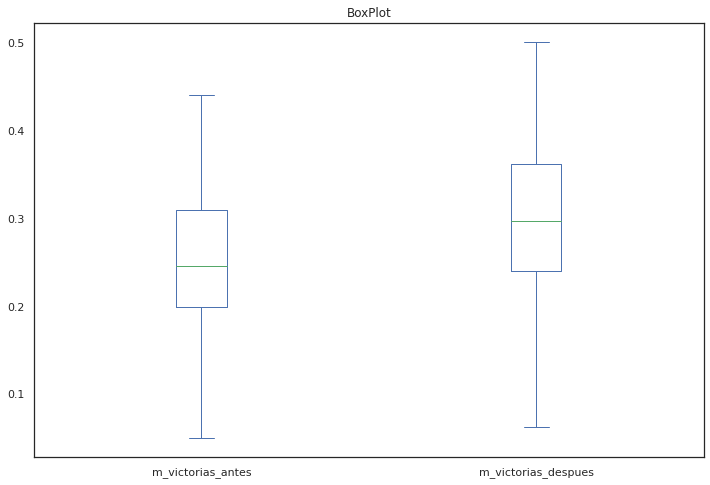

In [ ]:
df_medias_latinoamerica_outlier_2.plot(kind='box',y=['m_victorias_antes','m_victorias_despues'],title="BoxPlot")

In [ ]:
selected_features = ['m_victorias_antes']#, 'm_goles_recibidos_antes','m_puntos_hechos_antes', 'm_victorias_antes']
selected_variable = 'm_victorias_despues'

Separar en train y test

In [ ]:
p_train = 0.80 # Porcentaje de train.

entreno = df_medias_latinoamerica_outlier_2[:int((len(df_medias_latinoamerica_outlier_2))*p_train)]
testeo = df_medias_latinoamerica_outlier_2[int((len(df_medias_latinoamerica_outlier_2))*p_train):]

print("Ejemplos usados para entrenar: ", len(entreno))
print("Ejemplos usados para test: ", len(testeo))

Ejemplos usados para entrenar:  92
Ejemplos usados para test:  24


Construcción  preliminar del modelo

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()
entre_x = np.asanyarray(entreno[['m_victorias_antes']])
entre_y = np.asanyarray(entreno[['m_victorias_despues']])
model.fit(entre_x, entre_y)


LinearRegression()

Coeficientes

In [ ]:
#print(selected_features)
#print('Coefientes: ', model.coef_)
print ('Coeficientes')
pd.DataFrame({'Nombre Variable': (selected_features) ,
              'Coefientes': model.coef_[0]})

Coeficientes


,Nombre Variable,Coefientes
0,m_victorias_antes,0.545025


In [ ]:
print('Interseccion', model.intercept_)

Interseccion [0.16337775]


Probar modelo en testeo

In [ ]:
x_test=np.asanyarray(testeo[selected_features])

In [ ]:
y_pred = model.predict(x_test)

Metricas de error

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error = mean_squared_error(testeo[selected_variable], y_pred)
print ('mean_squared_error', mean_squared_error)

mean_squared_error 0.0062903152115828176


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error = mean_absolute_error(testeo[selected_variable], y_pred)
print ('mean_absolute_error', mean_absolute_error)

mean_absolute_error 0.0643476112347882


In [ ]:
from sklearn.metrics import r2_score
R2 = r2_score(testeo[selected_variable], y_pred)
print ('R2', R2)

R2 0.31656454246934806


Grafica de la variable independiente vs la varaiable dependiente y la regresión lineal generada.

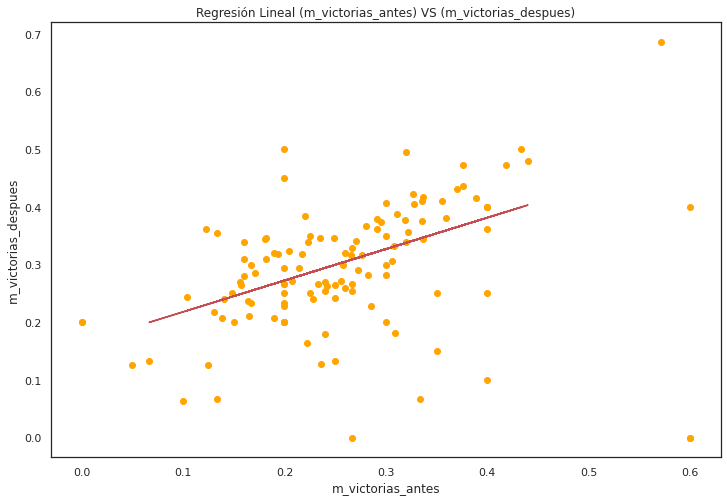

In [ ]:
plt.scatter(df_medias_latinoamerica.m_victorias_antes, df_medias_latinoamerica.m_victorias_despues, color='orange')#mostramos los datos
plt.plot(entre_x, model.coef_[0][0]*entre_x + model.intercept_[0],'-r')#Trazamos la linea
plt.title("Regresión Lineal (m_victorias_antes) VS (m_victorias_despues)")
plt.xlabel('m_victorias_antes')
plt.ylabel('m_victorias_despues')
plt.show()

Regresion Lineal 3 \
Varaibles independiente: m_goles_recibidos_antes \
Variable depentiente: m_goles_recibidos_despues

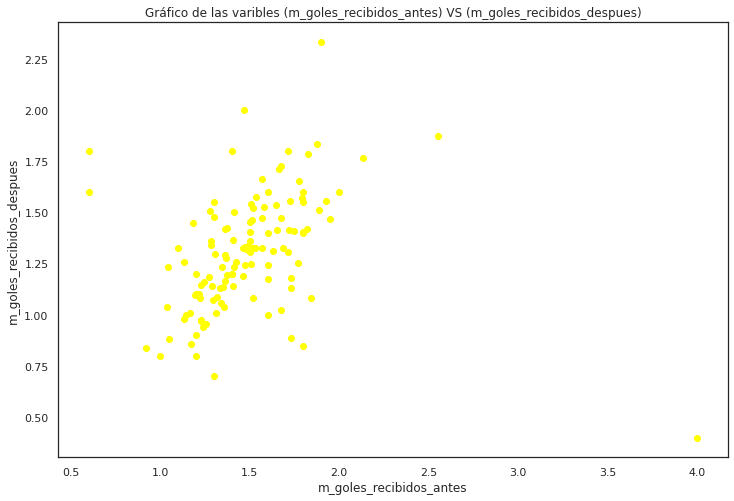

In [ ]:
plt.scatter(df_medias_latinoamerica.m_goles_recibidos_antes, df_medias_latinoamerica.m_goles_recibidos_despues, color ='yellow')
plt.title("Gráfico de las varibles (m_goles_recibidos_antes) VS (m_goles_recibidos_despues)")
plt.xlabel('m_goles_recibidos_antes')
plt.ylabel('m_goles_recibidos_despues')
plt.show()

Boxplot para ver outliers

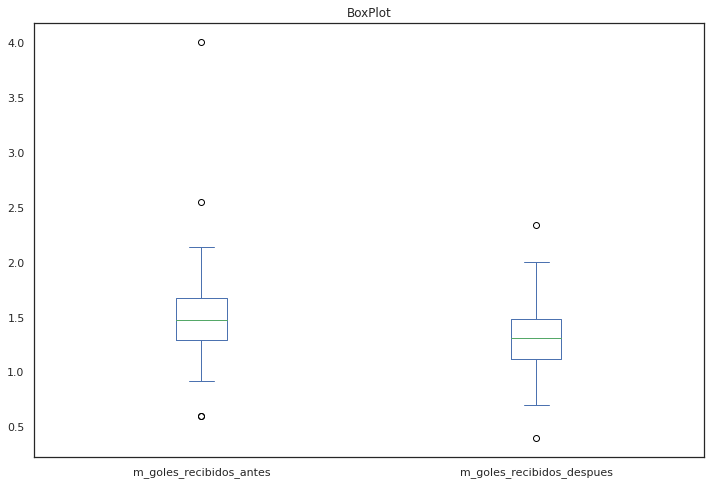

In [ ]:
df_medias_latinoamerica.plot(kind='box',y=['m_goles_recibidos_antes','m_goles_recibidos_despues'],title="BoxPlot")

Cálculo de bigotes superior e inferior de las variables a utilizar en la regresión lineal.

In [ ]:
#m_victorias_antes
#bigote inferior
m_goles_recibidos_antes_i=desc_latinoamerica['m_goles_recibidos_antes'][4] - 1.5 * (desc_latinoamerica['m_goles_recibidos_antes'][6]-desc_latinoamerica['m_goles_recibidos_antes'][4])
#bigote inferior
m_goles_recibidos_antes_s=desc_latinoamerica['m_goles_recibidos_antes'][6] + 1.5 * (desc_latinoamerica['m_goles_recibidos_antes'][6]-desc_latinoamerica['m_goles_recibidos_antes'][4])

#m_victorias_despues
#bigote inferior
m_goles_recibidos_despues_i=desc_latinoamerica['m_goles_recibidos_despues'][4] - 1.5 * (desc_latinoamerica['m_goles_recibidos_despues'][6]-desc_latinoamerica['m_goles_recibidos_despues'][4])
#bigote inferior
m_goles_recibidos_despues_s=desc_latinoamerica['m_goles_recibidos_despues'][6] + 1.5 * (desc_latinoamerica['m_goles_recibidos_despues'][6]-desc_latinoamerica['m_goles_recibidos_despues'][4])

print('m_goles_recibidos_antes_i')
print(m_goles_recibidos_antes_i)
print("m_goles_recibidos_antes_s")
print(m_goles_recibidos_antes_s)
print("m_goles_recibidos_despues_i")
print(m_goles_recibidos_despues_i)
print("m_goles_recibidos_despues_s")
print(m_goles_recibidos_despues_s)

m_goles_recibidos_antes_i
0.701896201624463
m_goles_recibidos_antes_s
2.260400740563784
m_goles_recibidos_despues_i
0.5802389277389283
m_goles_recibidos_despues_s
2.0163694638694634


Eliminación de Outliers utilizando los bigotes superior e inferior calculados.

In [ ]:
df_medias_latinoamerica_outlier_3 = df_medias_latinoamerica[(df_medias_latinoamerica['m_goles_recibidos_antes']<m_goles_recibidos_antes_s) & (df_medias_latinoamerica['m_goles_recibidos_antes']>m_goles_recibidos_antes_i) & (df_medias_latinoamerica['m_goles_recibidos_despues']<m_goles_recibidos_despues_s) & (df_medias_latinoamerica['m_goles_recibidos_despues']>m_goles_recibidos_despues_i)]

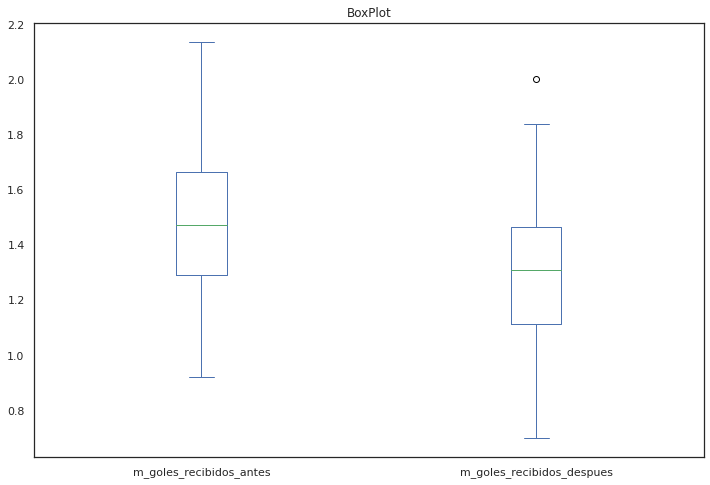

In [ ]:
df_medias_latinoamerica_outlier_3.plot(kind='box',y=['m_goles_recibidos_antes','m_goles_recibidos_despues'],title="BoxPlot")

In [ ]:
selected_features = ['m_goles_recibidos_antes']#, 'm_goles_recibidos_antes','m_puntos_hechos_antes', 'm_victorias_antes']
selected_variable = 'm_goles_recibidos_despues'

Separar en train y test

In [ ]:
p_train = 0.80 # Porcentaje de train.

entreno = df_medias_latinoamerica_outlier_3[:int((len(df_medias_latinoamerica_outlier_3))*p_train)]
testeo = df_medias_latinoamerica_outlier_3[int((len(df_medias_latinoamerica_outlier_3))*p_train):]

print("Ejemplos usados para entrenar: ", len(entreno))
print("Ejemplos usados para test: ", len(testeo))

Ejemplos usados para entrenar:  94
Ejemplos usados para test:  24


Construcción  preliminar del modelo

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()
entre_x = np.asanyarray(entreno[['m_goles_recibidos_antes']])
entre_y = np.asanyarray(entreno[['m_goles_recibidos_despues']])
model.fit(entre_x, entre_y)


LinearRegression()

Coeficientes

In [ ]:
#print(selected_features)
#print('Coefientes: ', model.coef_)
print ('Coeficientes')
pd.DataFrame({'Nombre Variable': (selected_features) ,
              'Coefientes': model.coef_[0]})

Coeficientes


,Nombre Variable,Coefientes
0,m_goles_recibidos_antes,0.589992


In [ ]:
print('Interseccion', model.intercept_)

Interseccion [0.43521369]


Probar modelo en testeo

In [ ]:
x_test=np.asanyarray(testeo[selected_features])

In [ ]:
y_pred = model.predict(x_test)

Metricas de error


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error = mean_squared_error(testeo[selected_variable], y_pred)
print ('mean_squared_error', mean_squared_error)

mean_squared_error 0.05002952970993115


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error = mean_absolute_error(testeo[selected_variable], y_pred)
print ('mean_absolute_error', mean_absolute_error)

mean_absolute_error 0.16895755237953491


In [ ]:
from sklearn.metrics import r2_score
R2 = r2_score(testeo[selected_variable], y_pred)
print ('R2', R2)

R2 0.31083488598843856


Grafica de la variable independiente vs la varaiable dependiente y la regresión lineal generada.

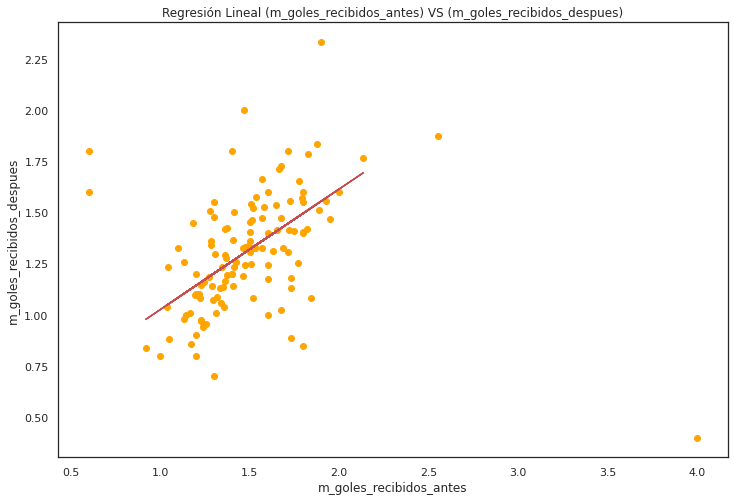

In [ ]:
plt.scatter(df_medias_latinoamerica.m_goles_recibidos_antes, df_medias_latinoamerica.m_goles_recibidos_despues, color='orange')#mostramos los datos
plt.plot(entre_x, model.coef_[0][0]*entre_x + model.intercept_[0],'-r')#Trazamos la linea
plt.title("Regresión Lineal (m_goles_recibidos_antes) VS (m_goles_recibidos_despues)")
plt.xlabel('m_goles_recibidos_antes')
plt.ylabel('m_goles_recibidos_despues')
plt.show()

Regresion Lineal 4 \
Varaibles independiente: m_puntos_hechos_antes \
Variable depentiente: m_puntos_hechos_despues

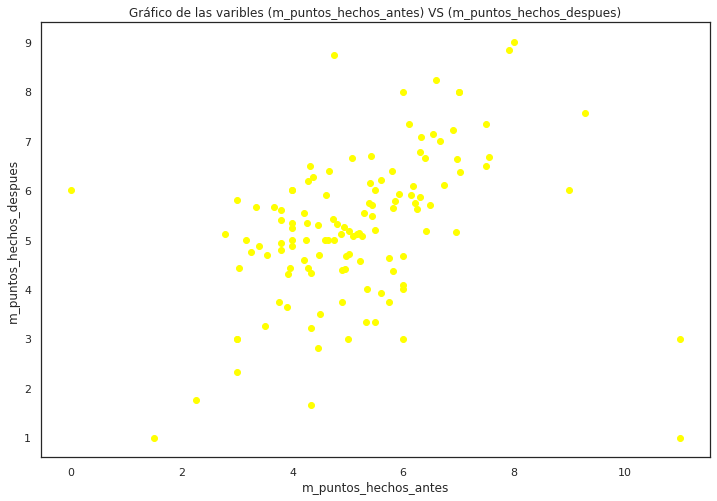

In [ ]:
plt.scatter(df_medias_latinoamerica.m_puntos_hechos_antes, df_medias_latinoamerica.m_puntos_hechos_despues, color ='yellow')
plt.title("Gráfico de las varibles (m_puntos_hechos_antes) VS (m_puntos_hechos_despues)")
plt.xlabel('m_puntos_hechos_antes')
plt.ylabel('m_puntos_hechos_despues')
plt.show()

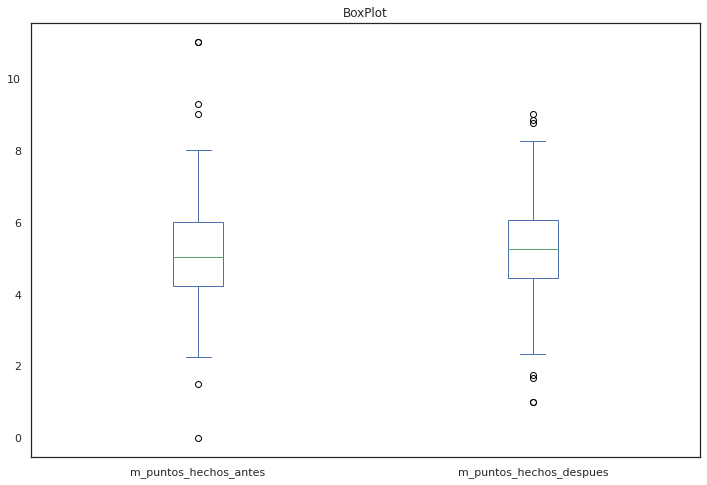

In [ ]:
df_medias_latinoamerica.plot(kind='box',y=['m_puntos_hechos_antes','m_puntos_hechos_despues'],title="BoxPlot")

Cálculo de bigotes superior e inferior de las variables a utilizar en la regresión lineal.


In [ ]:
#m_victorias_antes
#bigote inferior
m_puntos_hechos_antes_i=desc_latinoamerica['m_puntos_hechos_antes'][4] - 1.5 * (desc_latinoamerica['m_puntos_hechos_antes'][6]-desc_latinoamerica['m_puntos_hechos_antes'][4])
#bigote inferior
m_puntos_hechos_antes_s=desc_latinoamerica['m_puntos_hechos_antes'][6] + 1.5 * (desc_latinoamerica['m_puntos_hechos_antes'][6]-desc_latinoamerica['m_puntos_hechos_antes'][4])

#m_victorias_despues
#bigote inferior
m_puntos_hechos_despues_i=desc_latinoamerica['m_puntos_hechos_despues'][4] - 1.5 * (desc_latinoamerica['m_puntos_hechos_despues'][6]-desc_latinoamerica['m_puntos_hechos_despues'][4])
#bigote inferior
m_puntos_hechos_despues_s=desc_latinoamerica['m_puntos_hechos_despues'][6] + 1.5 * (desc_latinoamerica['m_puntos_hechos_despues'][6]-desc_latinoamerica['m_puntos_hechos_despues'][4])

print('m_puntos_hechos_antes_i')
print(m_puntos_hechos_antes_i)
print("m_puntos_hechos_antes_s")
print(m_puntos_hechos_antes_s)
print("m_puntos_hechos_despues_i")
print(m_puntos_hechos_despues_i)
print("m_puntos_hechos_despues_s")
print(m_puntos_hechos_despues_s)

m_puntos_hechos_antes_i
1.5151515151515151
m_puntos_hechos_antes_s
8.690909090909091
m_puntos_hechos_despues_i
2.0139751552795033
m_puntos_hechos_despues_s
8.461180124223603


Eliminación de Outliers utilizando los bigotes superior e inferior calculados.

In [ ]:
df_medias_latinoamerica_outlier_4 = df_medias_latinoamerica[(df_medias_latinoamerica['m_puntos_hechos_antes']<m_puntos_hechos_antes_s) & (df_medias_latinoamerica['m_puntos_hechos_antes']>m_puntos_hechos_antes_i) & (df_medias_latinoamerica['m_puntos_hechos_despues']<m_puntos_hechos_despues_s) & (df_medias_latinoamerica['m_puntos_hechos_despues']>m_puntos_hechos_despues_i)]

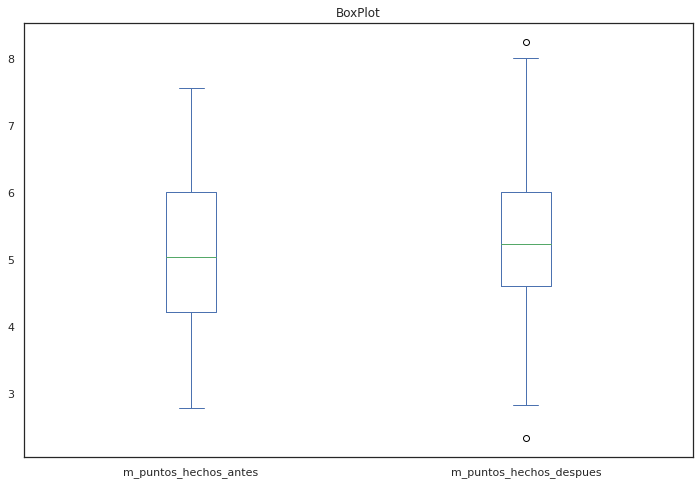

In [ ]:
df_medias_latinoamerica_outlier_4.plot(kind='box',y=['m_puntos_hechos_antes','m_puntos_hechos_despues'],title="BoxPlot")

In [ ]:
selected_features = ['m_puntos_hechos_antes']#, 'm_goles_recibidos_antes','m_puntos_hechos_antes', 'm_victorias_antes']
selected_variable = 'm_puntos_hechos_despues'

Separar en train y test

In [ ]:
p_train = 0.80 # Porcentaje de train.

entreno = df_medias_latinoamerica_outlier_4[:int((len(df_medias_latinoamerica_outlier_4))*p_train)]
testeo = df_medias_latinoamerica_outlier_4[int((len(df_medias_latinoamerica_outlier_4))*p_train):]

print("Ejemplos usados para entrenar: ", len(entreno))
print("Ejemplos usados para test: ", len(testeo))

Ejemplos usados para entrenar:  89
Ejemplos usados para test:  23


Construcción  preliminar del modelo

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()
entre_x = np.asanyarray(df_medias_latinoamerica_outlier_4[['m_puntos_hechos_antes']])
entre_y = np.asanyarray(df_medias_latinoamerica_outlier_4[['m_puntos_hechos_despues']])
model.fit(entre_x, entre_y)


LinearRegression()

Coeficientes

In [ ]:
#print(selected_features)
#print('Coefientes: ', model.coef_)
print ('Coeficientes')
pd.DataFrame({'Nombre Variable': (selected_features) ,
              'Coefientes': model.coef_[0]})

Coeficientes


,Nombre Variable,Coefientes
0,m_puntos_hechos_antes,0.542455


In [ ]:
print('Interseccion', model.intercept_)

Interseccion [2.52860949]


Probar modelo en testeo

In [ ]:
x_test=np.asanyarray(testeo[selected_features])

In [ ]:
y_pred = model.predict(x_test)

Metricas de error

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error = mean_squared_error(testeo[selected_variable], y_pred)
print ('mean_squared_error', mean_squared_error)

mean_squared_error 0.9725687327799039


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error = mean_absolute_error(testeo[selected_variable], y_pred)
print ('mean_absolute_error', mean_absolute_error)

mean_absolute_error 0.7892692571639858


In [ ]:
from sklearn.metrics import r2_score
R2 = r2_score(testeo[selected_variable], y_pred)
print ('R2', R2)

R2 0.43853643493474737


Grafica de la variable independiente vs la varaiable dependiente y la regresión lineal generada.

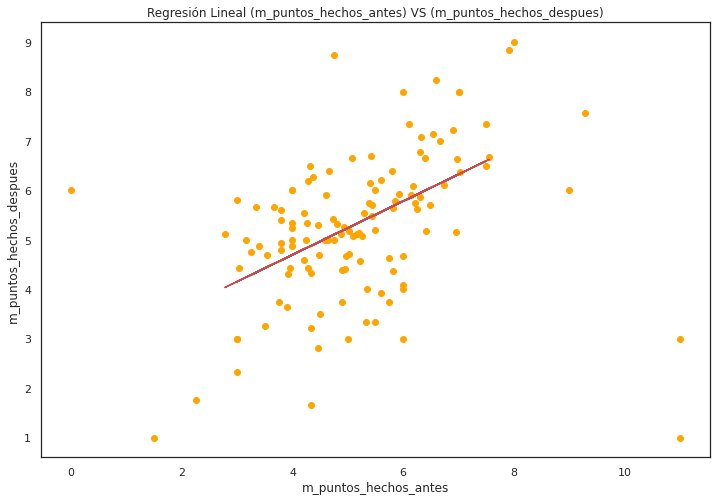

In [ ]:
#plt.scatter(df_medias.m_puntos_hechos_antes, df_medias.m_puntos_hechos_despues, color='orange')#mostramos los datos
plt.scatter(df_medias_latinoamerica.m_puntos_hechos_antes, df_medias_latinoamerica.m_puntos_hechos_despues, color='orange')#mostramos los datos
plt.plot(entre_x, model.coef_[0][0]*entre_x + model.intercept_[0],'-r')#Trazamos la linea
plt.title("Regresión Lineal (m_puntos_hechos_antes) VS (m_puntos_hechos_despues)")
plt.xlabel('m_puntos_hechos_antes')
plt.ylabel('m_puntos_hechos_despues')
plt.show()

#**Regresion Lineal Ligas Femeninas**

**Transformación de Dataframe (Ligas femeninas)**

Se transforma el Dataframe acumulando el promedio por equipo de las siguientes variables:
-	promedio_goles_hechos_antes_de_cambio_entrenador_1_5
-	promedio_goles_hechos_despues_de_cambio_entrenador_1_5
-	promedio_goles_recibidos_antes_de_cambio_entrenador_1_5
-	promedio_goles_recibidos_despues_de_cambio_entrenador_1_5
-	puntos_hechos_antes_de_cambio_entrenador_1_5
-	puntos_hechos_despues_de_cambio_entrenador_1_5
-	porcentaje_victorias_antes_de_cambio_entrenador_1_5
-	porcentaje_victorias_despues_de_cambio_entrenador_1_5

Cada nueva estancia del Dataset transformado representa un club de fútbol.

In [ ]:
equipos_fememinos=pd.unique(europa_femenina['equipo'])

In [ ]:
equipo_lista = []
m_goles_hechos_antes = []
m_goles_hechos_despues = []
m_goles_recibidos_antes = []
m_goles_recibidos_despues = []
m_puntos_hechos_antes = []
m_puntos_hechos_despues = []
m_victorias_antes = []
m_victorias_despues = []

for equipo in equipos_fememinos:
  equipo_actual = europa_femenina[europa_femenina['equipo']==equipo]
  equipo_actual_estadistica = equipo_actual.describe()

  equipo_lista.append(equipo)
  m_goles_hechos_antes.append(equipo_actual_estadistica['promedio_goles_hechos_antes_de_cambio_entrenador_1_5'][1])
  m_goles_hechos_despues.append(equipo_actual_estadistica['promedio_goles_hechos_despues_de_cambio_entrenador_1_5'][1])
  m_goles_recibidos_antes.append(equipo_actual_estadistica['promedio_goles_recibidos_antes_de_cambio_entrenador_1_5'][1])
  m_goles_recibidos_despues.append(equipo_actual_estadistica['promedio_goles_recibidos_despues_de_cambio_entrenador_1_5'][1])
  m_puntos_hechos_antes.append(equipo_actual_estadistica['puntos_hechos_antes_de_cambio_entrenador_1_5'][1])
  m_puntos_hechos_despues.append(equipo_actual_estadistica['puntos_hechos_despues_de_cambio_entrenador_1_5'][1])
  m_victorias_antes.append(equipo_actual_estadistica['porcentaje_victorias_antes_de_cambio_entrenador_1_5'][1])
  m_victorias_despues.append(equipo_actual_estadistica['porcentaje_victorias_despues_de_cambio_entrenador_1_5'][1])

df_medias_femenina = pd.DataFrame({'equipo':equipo_lista,
                                  'm_goles_hechos_antes':m_goles_hechos_antes,
                                  'm_goles_hechos_despues':m_goles_hechos_despues,
                                  'm_goles_recibidos_antes':m_goles_recibidos_antes,
                                  'm_goles_recibidos_despues':m_goles_recibidos_despues,
                                  'm_puntos_hechos_antes':m_puntos_hechos_antes,
                                  'm_puntos_hechos_despues':m_puntos_hechos_despues,
                                  'm_victorias_antes':m_victorias_antes,
                                  'm_victorias_despues':m_victorias_despues
                                  })

In [ ]:
df_medias_femenina

,equipo,m_goles_hechos_antes,m_goles_hechos_despues,m_goles_recibidos_antes,m_goles_recibidos_despues,m_puntos_hechos_antes,m_puntos_hechos_despues,m_victorias_antes,m_victorias_despues
0,Colonia,1.5,0.550000,2.800000,2.050000,3.333333,2.000000,0.166667,0.1
1,Hoffenheim,3.6,1.600000,0.600000,1.600000,12.000000,7.000000,0.800000,0.4
2,Eintracht Frankfurt,1.0,2.800000,0.000000,0.800000,3.000000,11.000000,1.000000,0.6
3,Bayern Múnich,1.9,1.938889,1.833333,1.233333,7.166667,7.666667,0.400000,0.5
4,Wolfsburgo,3.2,2.800000,1.733333,1.066667,11.666667,10.000000,0.733333,0.6
...,...,...,...,...,...,...,...,...,...
140,Rosenborg BK,2.0,2.200000,0.800000,0.000000,11.000000,15.000000,0.600000,1.0
141,Vålerenga IF,1.6,2.200000,0.600000,1.000000,11.000000,12.000000,0.600000,0.8
142,Avaldsnes IL,3.3,1.400000,0.500000,1.500000,13.500000,7.500000,0.900000,0.5
143,Lillestrøm SK,4.6,4.400000,0.800000,1.200000,13.000000,13.000000,0.800000,0.8


Porcentaje de datos perdidos en el Dataset.

In [ ]:
for col in df_medias_femenina.columns:
    pct_missing = np.mean(df_medias_femenina[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

equipo - 0%
m_goles_hechos_antes - 0%
m_goles_hechos_despues - 0%
m_goles_recibidos_antes - 0%
m_goles_recibidos_despues - 0%
m_puntos_hechos_antes - 0%
m_puntos_hechos_despues - 0%
m_victorias_antes - 0%
m_victorias_despues - 0%


In [ ]:
df_medias_femenina.dtypes

equipo                        object
m_goles_hechos_antes         float64
m_goles_hechos_despues       float64
m_goles_recibidos_antes      float64
m_goles_recibidos_despues    float64
m_puntos_hechos_antes        float64
m_puntos_hechos_despues      float64
m_victorias_antes            float64
m_victorias_despues          float64
dtype: object

Varaibles no numericas

In [ ]:
df_numeric = df_medias_femenina.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['m_goles_hechos_antes' 'm_goles_hechos_despues' 'm_goles_recibidos_antes'
 'm_goles_recibidos_despues' 'm_puntos_hechos_antes'
 'm_puntos_hechos_despues' 'm_victorias_antes' 'm_victorias_despues']


Trasponer Dataset

In [ ]:
df_medias_femenina_transpose = transpose(df_medias_femenina[numeric_cols])

In [ ]:
names =  df_medias_femenina_transpose.index
names

Index(['m_goles_hechos_antes', 'm_goles_hechos_despues',
       'm_goles_recibidos_antes', 'm_goles_recibidos_despues',
       'm_puntos_hechos_antes', 'm_puntos_hechos_despues', 'm_victorias_antes',
       'm_victorias_despues'],
      dtype='object')


Grafico de Correlación de variables.


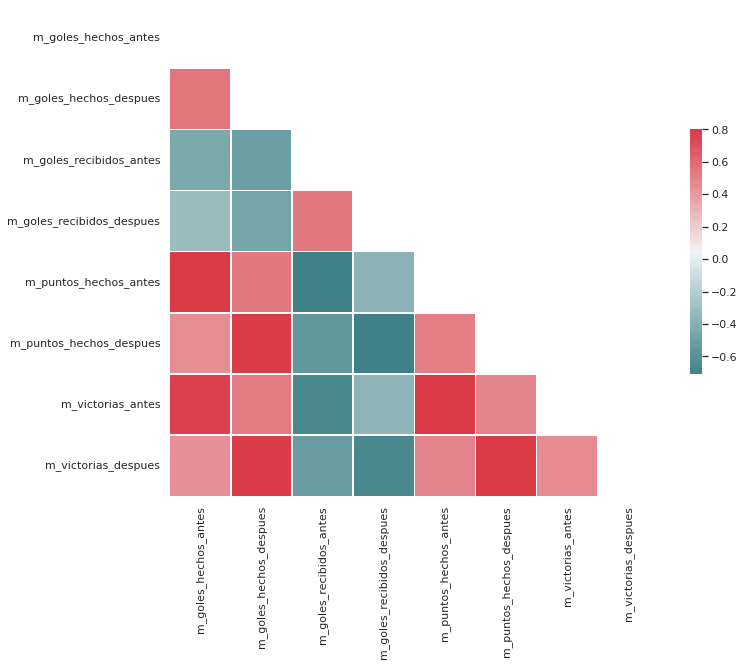

In [ ]:
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html
R = corrcoef(df_medias_femenina_transpose)

# http://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
# Generate a mask for the upper triangle
sns.set(style="white")
mask = np.zeros_like(R, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(R, mask=mask, cmap=cmap, vmax=.8,
            square=True, xticklabels=names, yticklabels=names,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [ ]:
desc_femenina=df_medias_femenina.describe()
desc_femenina

,m_goles_hechos_antes,m_goles_hechos_despues,m_goles_recibidos_antes,m_goles_recibidos_despues,m_puntos_hechos_antes,m_puntos_hechos_despues,m_victorias_antes,m_victorias_despues
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,1.444028,1.614397,1.832467,1.689759,6.088598,6.820892,0.351618,0.405459
std,0.838269,1.062891,0.938472,0.927093,3.889372,4.051841,0.274484,0.280329
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.911111,1.000000,1.000000,1.000000,3.000000,3.600000,0.160000,0.200000
50%,1.200000,1.300000,1.800000,1.600000,5.000000,6.000000,0.300000,0.400000
75%,1.866667,2.000000,2.500000,2.200000,9.000000,9.250000,0.550000,0.600000
max,4.600000,6.200000,4.600000,5.500000,15.000000,15.000000,1.000000,1.000000


Regresión Lineal 1\
Varaibles independiente: m_goles_hechos_antes \
Variable depentiente: m_goles_hechos_despues

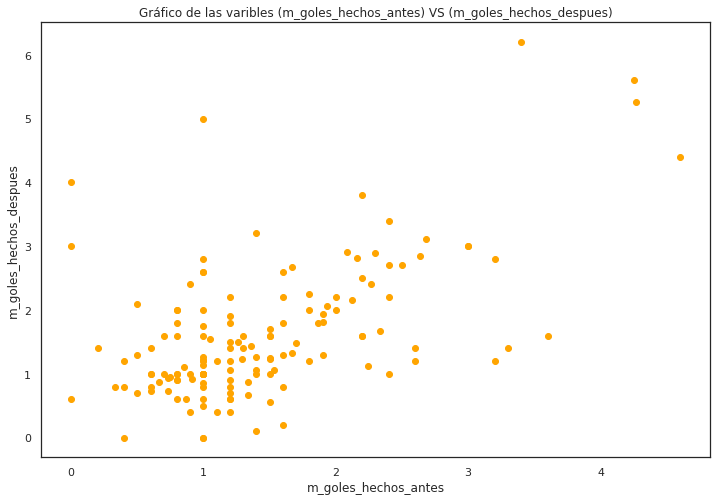

In [ ]:
plt.scatter(df_medias_femenina.m_goles_hechos_antes, df_medias_femenina.m_goles_hechos_despues, color ='orange')
plt.xlabel('m_goles_hechos_antes')
plt.ylabel('m_goles_hechos_despues')
plt.title("Gráfico de las varibles (m_goles_hechos_antes) VS (m_goles_hechos_despues)")
plt.show()

Boxplot para ver outliers

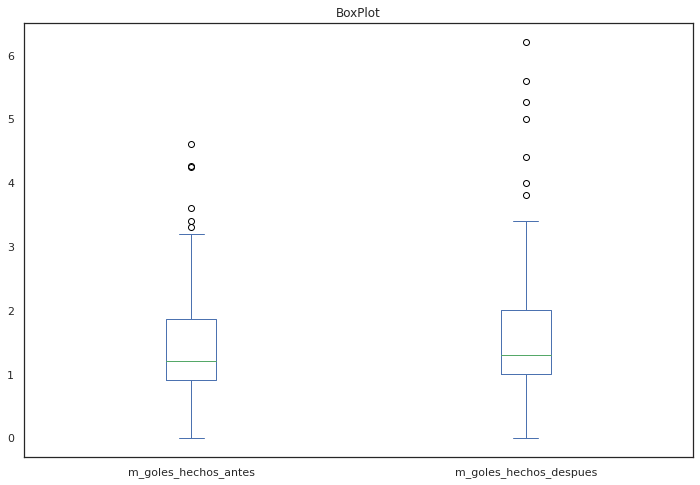

In [ ]:
df_medias_femenina.plot(kind='box',y=['m_goles_hechos_antes','m_goles_hechos_despues'],title="BoxPlot")

Cálculo de bigotes superior e inferior de las variables a utilizar en la regresión lineal.

In [ ]:
#m_goles_hechos_antes
#bigote inferior
m_goles_hechos_antes_i=desc_femenina['m_goles_hechos_antes'][4] - 1.5 * (desc_femenina['m_goles_hechos_antes'][6]-desc_femenina['m_goles_hechos_antes'][4])
#bigote inferior
m_goles_hechos_antes_s=desc_femenina['m_goles_hechos_antes'][6] + 1.5 * (desc_femenina['m_goles_hechos_antes'][6]-desc_femenina['m_goles_hechos_antes'][4])

#m_goles_hechos_despues
#bigote inferior
m_goles_hechos_despues_i=desc_femenina['m_goles_hechos_despues'][4] - 1.5 * (desc_femenina['m_goles_hechos_despues'][6]-desc_femenina['m_goles_hechos_despues'][4])
#bigote inferior
m_goles_hechos_despues_s=desc_femenina['m_goles_hechos_despues'][6] + 1.5 * (desc_femenina['m_goles_hechos_despues'][6]-desc_femenina['m_goles_hechos_despues'][4])

print('m_goles_hechos_antes_i')
print(m_goles_hechos_antes_i)
print("m_goles_hechos_antes_s")
print(m_goles_hechos_antes_s)
print("m_goles_hechos_despues_i")
print(m_goles_hechos_despues_i)
print("m_goles_hechos_despues_s")
print(m_goles_hechos_despues_s)

m_goles_hechos_antes_i
-0.5222222222222217
m_goles_hechos_antes_s
3.2999999999999994
m_goles_hechos_despues_i
-0.5
m_goles_hechos_despues_s
3.5


Eliminación de Outliers utilizando los bigotes superior e inferior calculados.

In [ ]:
df_medias_femenina_outlier_1 = df_medias_femenina[(df_medias_femenina['m_goles_hechos_antes']<m_goles_hechos_antes_s) & (df_medias_femenina['m_goles_hechos_antes']>m_goles_hechos_antes_i) & (df_medias_femenina['m_goles_hechos_despues']<m_goles_hechos_despues_s) & (df_medias_femenina['m_goles_hechos_despues']>m_goles_hechos_despues_i)]

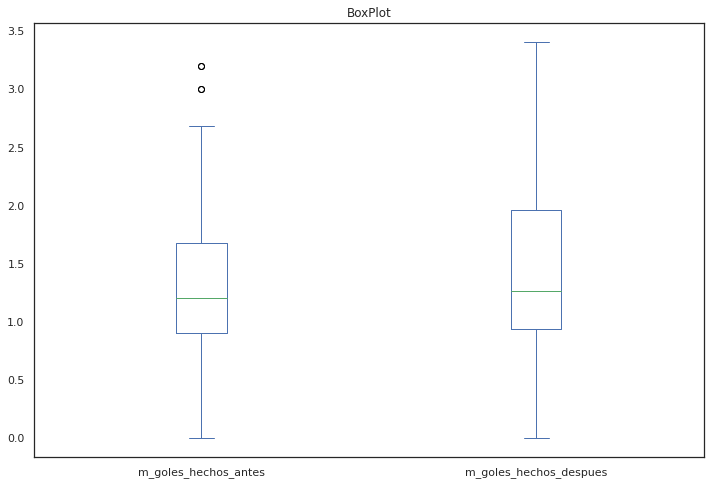

In [ ]:
df_medias_femenina_outlier_1.plot(kind='box',y=['m_goles_hechos_antes','m_goles_hechos_despues'],title="BoxPlot")

In [ ]:
selected_features = ['m_goles_hechos_antes']#, 'm_goles_recibidos_antes','m_puntos_hechos_antes', 'm_victorias_antes']
selected_variable = 'm_goles_hechos_despues'

Separar en train y test

In [ ]:
p_train = 0.80 # Porcentaje de train.

entreno = df_medias_femenina_outlier_1[:int((len(df_medias_femenina_outlier_1))*p_train)]
testeo = df_medias_femenina_outlier_1[int((len(df_medias_femenina_outlier_1))*p_train):]

print("Ejemplos usados para entrenar: ", len(entreno))
print("Ejemplos usados para test: ", len(testeo))

Ejemplos usados para entrenar:  108
Ejemplos usados para test:  28


Construcción  preliminar del modelo

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()
entre_x = np.asanyarray(entreno[['m_goles_hechos_antes']])
entre_y = np.asanyarray(entreno[['m_goles_hechos_despues']])
model.fit(entre_x, entre_y)


LinearRegression()

Coeficientes

In [ ]:
#print(selected_features)
#print('Coefientes: ', model.coef_)
print ('Coeficientes')
pd.DataFrame({'Nombre Variable': (selected_features) ,
              'Coefientes': model.coef_[0]})

Coeficientes


,Nombre Variable,Coefientes
0,m_goles_hechos_antes,0.644828


In [ ]:
print('Interseccion', model.intercept_)

Interseccion [0.55807469]


Probar modelo en testeo

In [ ]:
x_test=np.asanyarray(testeo[selected_features])

In [ ]:
y_pred = model.predict(x_test)

Metricas de error


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error = mean_squared_error(testeo[selected_variable], y_pred)
print ('mean_squared_error', mean_squared_error)

mean_squared_error 0.4783907701983036


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error = mean_absolute_error(testeo[selected_variable], y_pred)
print ('mean_absolute_error', mean_absolute_error)

mean_absolute_error 0.5219068180360498


In [ ]:
from sklearn.metrics import r2_score
R2 = r2_score(testeo[selected_variable], y_pred)
print ('R2', R2)

R2 0.00894154559943694


Grafica de la variable independiente vs la varaiable dependiente y la regresión lineal generada.

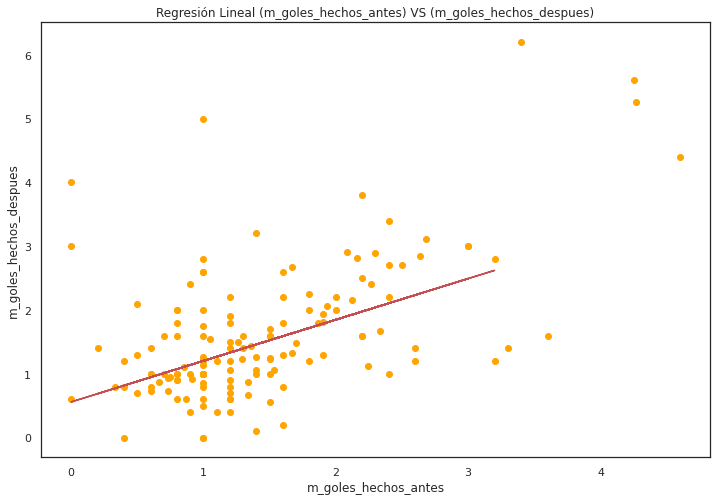

In [ ]:
plt.scatter(df_medias_femenina.m_goles_hechos_antes, df_medias_femenina.m_goles_hechos_despues, color='orange')#mostramos los datos
plt.plot(entre_x, model.coef_[0][0]*entre_x + model.intercept_[0],'-r')#Trazamos la linea
plt.title("Regresión Lineal (m_goles_hechos_antes) VS (m_goles_hechos_despues)")
plt.xlabel('m_goles_hechos_antes')
plt.ylabel('m_goles_hechos_despues')
plt.show()

Regresion Lineal 2 \
Varaibles independiente: m_goles_hechos_antes \
Variable depentiente: m_goles_hechos_despues

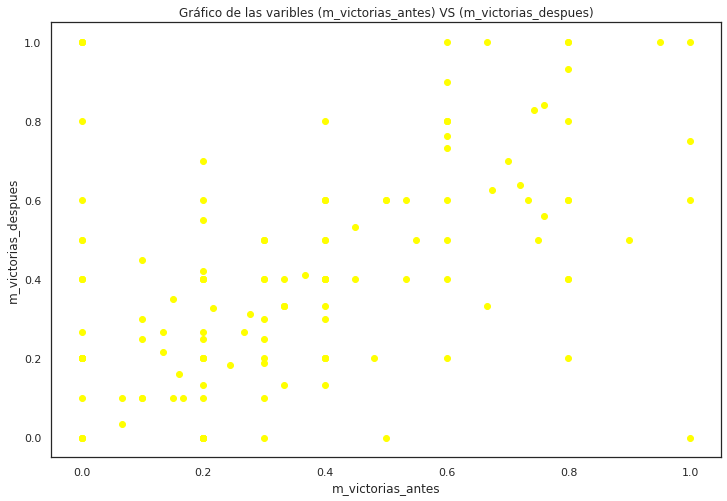

In [ ]:
plt.scatter(df_medias_femenina.m_victorias_antes, df_medias_femenina.m_victorias_despues, color ='yellow')
plt.title("Gráfico de las varibles (m_victorias_antes) VS (m_victorias_despues)")
plt.xlabel('m_victorias_antes')
plt.ylabel('m_victorias_despues')
plt.show()

Boxplot para ver outliers

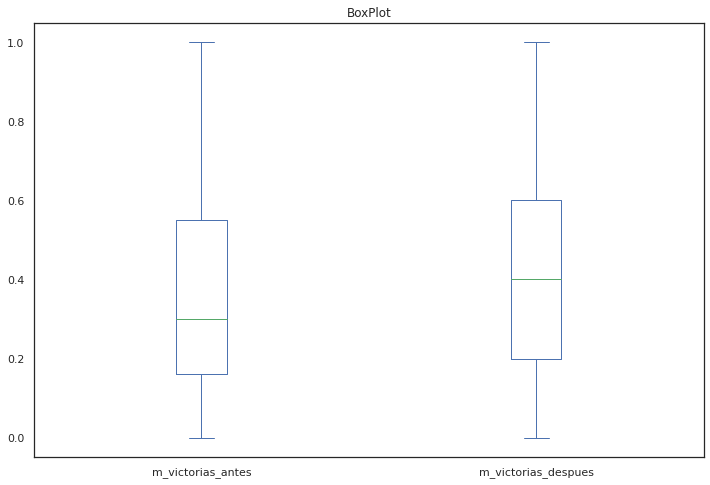

In [ ]:
df_medias_femenina.plot(kind='box',y=['m_victorias_antes','m_victorias_despues'],title="BoxPlot")

Cálculo de bigotes superior e inferior de las variables a utilizar en la regresión lineal.

In [ ]:
#m_victorias_antes
#bigote inferior
m_victorias_antes_i=desc_femenina['m_victorias_antes'][4] - 1.5 * (desc_femenina['m_victorias_antes'][6]-desc_femenina['m_victorias_antes'][4])
#bigote inferior
m_victorias_antes_s=desc_femenina['m_victorias_antes'][6] + 1.5 * (desc_femenina['m_victorias_antes'][6]-desc_femenina['m_victorias_antes'][4])

#m_victorias_despues
#bigote inferior
m_victorias_despues_i=desc_femenina['m_victorias_despues'][4] - 1.5 * (desc_femenina['m_victorias_despues'][6]-desc_femenina['m_victorias_despues'][4])
#bigote inferior
m_victorias_despues_s=desc_femenina['m_victorias_despues'][6] + 1.5 * (desc_femenina['m_victorias_despues'][6]-desc_femenina['m_victorias_despues'][4])

print('m_victorias_antes_i')
print(m_victorias_antes_i)
print("m_victorias_antes_s")
print(m_victorias_antes_s)
print("m_victorias_despues_i")
print(m_victorias_despues_i)
print("m_victorias_despues_s")
print(m_victorias_despues_s)

m_victorias_antes_i
-0.42499999999999993
m_victorias_antes_s
1.135
m_victorias_despues_i
-0.39999999999999997
m_victorias_despues_s
1.2


Eliminación de Outliers utilizando los bigotes superior e inferior calculados.

In [ ]:
df_medias_femenina_outlier_2 = df_medias_femenina[(df_medias_femenina['m_victorias_antes']<m_victorias_antes_s) & (df_medias_femenina['m_victorias_antes']>m_victorias_antes_i) & (df_medias_femenina['m_victorias_despues']<m_victorias_despues_s) & (df_medias_femenina['m_victorias_despues']>m_victorias_despues_i) ]

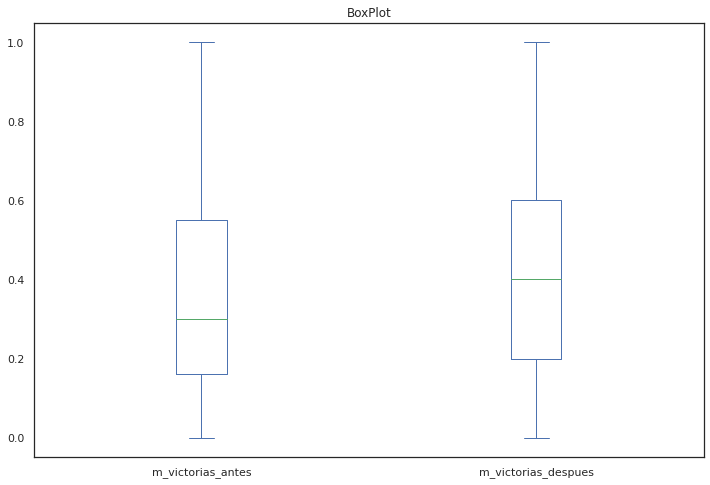

In [ ]:
df_medias_femenina_outlier_2.plot(kind='box',y=['m_victorias_antes','m_victorias_despues'],title="BoxPlot")

In [ ]:
selected_features = ['m_victorias_antes']#, 'm_goles_recibidos_antes','m_puntos_hechos_antes', 'm_victorias_antes']
selected_variable = 'm_victorias_despues'

Separar en train y test

In [ ]:
p_train = 0.80 # Porcentaje de train.

entreno = df_medias_latinoamerica_outlier_2[:int((len(df_medias_latinoamerica_outlier_2))*p_train)]
testeo = df_medias_latinoamerica_outlier_2[int((len(df_medias_latinoamerica_outlier_2))*p_train):]

print("Ejemplos usados para entrenar: ", len(entreno))
print("Ejemplos usados para test: ", len(testeo))

Ejemplos usados para entrenar:  92
Ejemplos usados para test:  24


Construcción  preliminar del modelo

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()
entre_x = np.asanyarray(entreno[['m_victorias_antes']])
entre_y = np.asanyarray(entreno[['m_victorias_despues']])
model.fit(entre_x, entre_y)


LinearRegression()

Coeficientes

In [ ]:
#print(selected_features)
#print('Coefientes: ', model.coef_)
print ('Coeficientes')
pd.DataFrame({'Nombre Variable': (selected_features) ,
              'Coefientes': model.coef_[0]})

Coeficientes


,Nombre Variable,Coefientes
0,m_victorias_antes,0.545025


In [ ]:
print('Interseccion', model.intercept_)

Interseccion [0.16337775]


Probar modelo en testeo

In [ ]:
x_test=np.asanyarray(testeo[selected_features])

In [ ]:
y_pred = model.predict(x_test)

Metricas de error

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error = mean_squared_error(testeo[selected_variable], y_pred)
print ('mean_squared_error', mean_squared_error)

mean_squared_error 0.0062903152115828176


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error = mean_absolute_error(testeo[selected_variable], y_pred)
print ('mean_absolute_error', mean_absolute_error)

mean_absolute_error 0.0643476112347882


In [ ]:
from sklearn.metrics import r2_score
R2 = r2_score(testeo[selected_variable], y_pred)
print ('R2', R2)

R2 0.31656454246934806


Grafica de la variable independiente vs la varaiable dependiente y la regresión lineal generada.

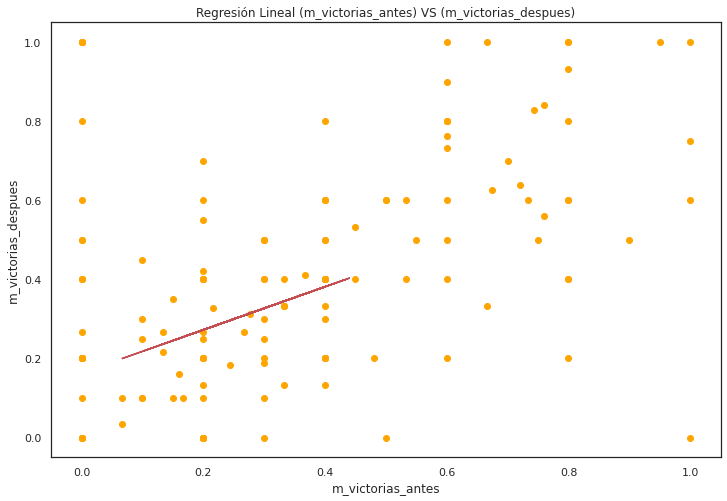

In [ ]:
plt.scatter(df_medias_femenina.m_victorias_antes, df_medias_femenina.m_victorias_despues, color='orange')#mostramos los datos
plt.plot(entre_x, model.coef_[0][0]*entre_x + model.intercept_[0],'-r')#Trazamos la linea
plt.title("Regresión Lineal (m_victorias_antes) VS (m_victorias_despues)")
plt.xlabel('m_victorias_antes')
plt.ylabel('m_victorias_despues')
plt.show()

Regresion Lineal 3 \
Varaibles independiente: m_goles_recibidos_antes \
Variable depentiente: m_goles_recibidos_despues

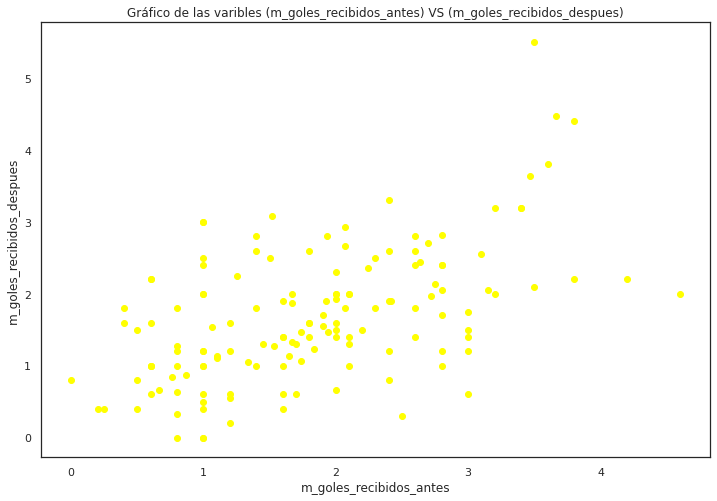

In [ ]:
plt.scatter(df_medias_femenina.m_goles_recibidos_antes, df_medias_femenina.m_goles_recibidos_despues, color ='yellow')
plt.title("Gráfico de las varibles (m_goles_recibidos_antes) VS (m_goles_recibidos_despues)")
plt.xlabel('m_goles_recibidos_antes')
plt.ylabel('m_goles_recibidos_despues')
plt.show()

Boxplot para ver outliers

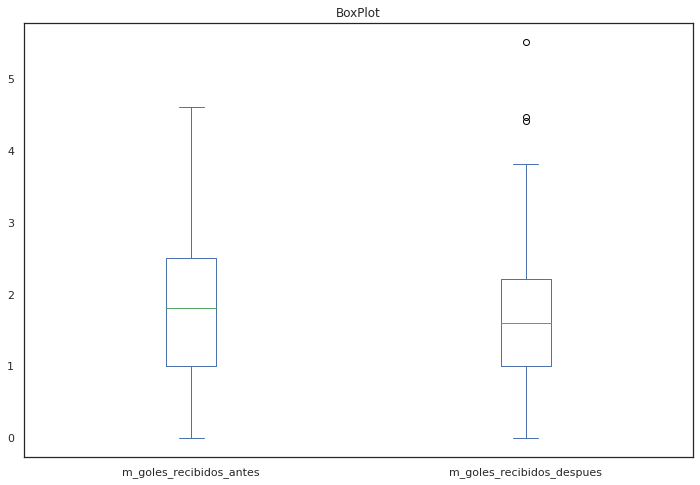

In [ ]:
df_medias_femenina.plot(kind='box',y=['m_goles_recibidos_antes','m_goles_recibidos_despues'],title="BoxPlot")

Cálculo de bigotes superior e inferior de las variables a utilizar en la regresión lineal.

In [ ]:
#m_victorias_antes
#bigote inferior
m_goles_recibidos_antes_i=desc_femenina['m_goles_recibidos_antes'][4] - 1.5 * (desc_femenina['m_goles_recibidos_antes'][6]-desc_femenina['m_goles_recibidos_antes'][4])
#bigote inferior
m_goles_recibidos_antes_s=desc_femenina['m_goles_recibidos_antes'][6] + 1.5 * (desc_femenina['m_goles_recibidos_antes'][6]-desc_femenina['m_goles_recibidos_antes'][4])

#m_victorias_despues
#bigote inferior
m_goles_recibidos_despues_i=desc_femenina['m_goles_recibidos_despues'][4] - 1.5 * (desc_femenina['m_goles_recibidos_despues'][6]-desc_femenina['m_goles_recibidos_despues'][4])
#bigote inferior
m_goles_recibidos_despues_s=desc_femenina['m_goles_recibidos_despues'][6] + 1.5 * (desc_femenina['m_goles_recibidos_despues'][6]-desc_femenina['m_goles_recibidos_despues'][4])

print('m_goles_recibidos_antes_i')
print(m_goles_recibidos_antes_i)
print("m_goles_recibidos_antes_s")
print(m_goles_recibidos_antes_s)
print("m_goles_recibidos_despues_i")
print(m_goles_recibidos_despues_i)
print("m_goles_recibidos_despues_s")
print(m_goles_recibidos_despues_s)

m_goles_recibidos_antes_i
-1.25
m_goles_recibidos_antes_s
4.75
m_goles_recibidos_despues_i
-0.8000000000000003
m_goles_recibidos_despues_s
4.0


Eliminación de Outliers utilizando los bigotes superior e inferior calculados.

In [ ]:
df_medias_femenina_outlier_3 = df_medias_femenina[(df_medias_femenina['m_goles_recibidos_antes']<m_goles_recibidos_antes_s) & (df_medias_femenina['m_goles_recibidos_antes']>m_goles_recibidos_antes_i) & (df_medias_femenina['m_goles_recibidos_despues']<m_goles_recibidos_despues_s) & (df_medias_femenina['m_goles_recibidos_despues']>m_goles_recibidos_despues_i)]

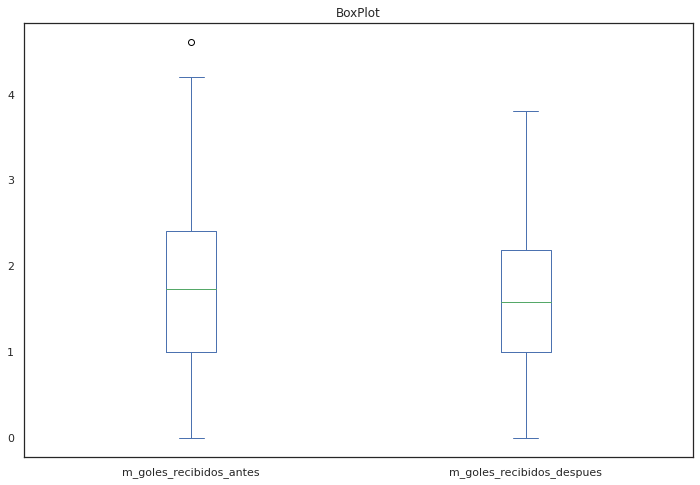

In [ ]:
df_medias_femenina_outlier_3.plot(kind='box',y=['m_goles_recibidos_antes','m_goles_recibidos_despues'],title="BoxPlot")

In [ ]:
selected_features = ['m_goles_recibidos_antes']#, 'm_goles_recibidos_antes','m_puntos_hechos_antes', 'm_victorias_antes']
selected_variable = 'm_goles_recibidos_despues'

Separar en train y test

In [ ]:
p_train = 0.80 # Porcentaje de train.

entreno = df_medias_femenina_outlier_3[:int((len(df_medias_femenina_outlier_3))*p_train)]
testeo = df_medias_femenina_outlier_3[int((len(df_medias_femenina_outlier_3))*p_train):]

print("Ejemplos usados para entrenar: ", len(entreno))
print("Ejemplos usados para test: ", len(testeo))

Ejemplos usados para entrenar:  113
Ejemplos usados para test:  29


Construcción  preliminar del modelo

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()
entre_x = np.asanyarray(entreno[['m_goles_recibidos_antes']])
entre_y = np.asanyarray(entreno[['m_goles_recibidos_despues']])
model.fit(entre_x, entre_y)


LinearRegression()

Coeficientes

In [ ]:
#print(selected_features)
#print('Coefientes: ', model.coef_)
print ('Coeficientes')
pd.DataFrame({'Nombre Variable': (selected_features) ,
              'Coefientes': model.coef_[0]})

Coeficientes


,Nombre Variable,Coefientes
0,m_goles_recibidos_antes,0.471353


In [ ]:
print('Interseccion', model.intercept_)

Interseccion [0.83473654]


Probar modelo en testeo

In [ ]:
x_test=np.asanyarray(testeo[selected_features])

In [ ]:
y_pred = model.predict(x_test)

Metricas de error

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error = mean_squared_error(testeo[selected_variable], y_pred)
print ('mean_squared_error', mean_squared_error)

mean_squared_error 0.33917178323522296


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error = mean_absolute_error(testeo[selected_variable], y_pred)
print ('mean_absolute_error', mean_absolute_error)

mean_absolute_error 0.4636394567187442


In [ ]:
from sklearn.metrics import r2_score
R2 = r2_score(testeo[selected_variable], y_pred)
print ('R2', R2)

R2 -0.30524306996913975


Grafica de la variable independiente vs la varaiable dependiente y la regresión lineal generada.

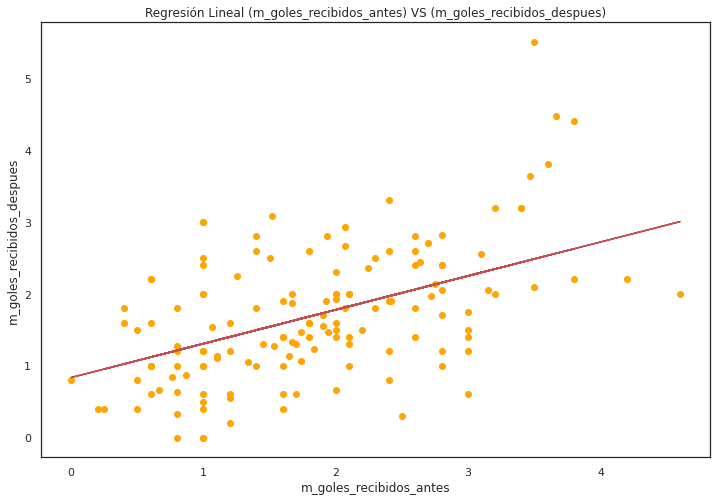

In [ ]:
plt.scatter(df_medias_femenina.m_goles_recibidos_antes, df_medias_femenina.m_goles_recibidos_despues, color='orange')#mostramos los datos
plt.plot(entre_x, model.coef_[0][0]*entre_x + model.intercept_[0],'-r')#Trazamos la linea
plt.title("Regresión Lineal (m_goles_recibidos_antes) VS (m_goles_recibidos_despues)")
plt.xlabel('m_goles_recibidos_antes')
plt.ylabel('m_goles_recibidos_despues')
plt.show()

Regresion Lineal 4 \
Varaibles independiente: m_puntos_hechos_antes \
Variable depentiente: m_puntos_hechos_despues

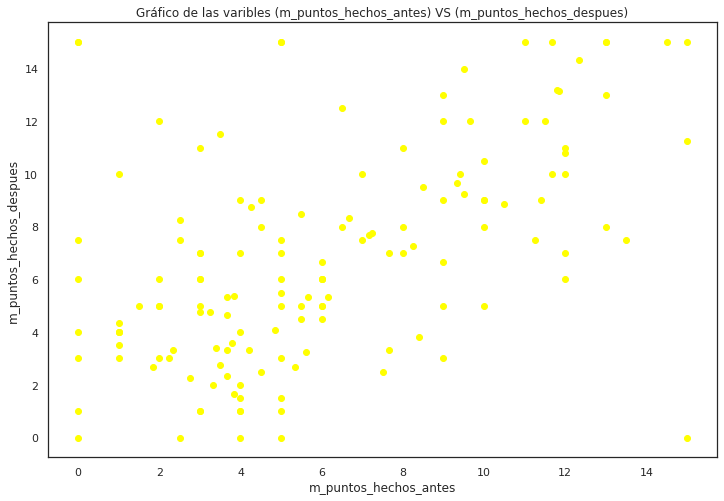

In [ ]:
plt.scatter(df_medias_femenina.m_puntos_hechos_antes, df_medias_femenina.m_puntos_hechos_despues, color ='yellow')
plt.title("Gráfico de las varibles (m_puntos_hechos_antes) VS (m_puntos_hechos_despues)")
plt.xlabel('m_puntos_hechos_antes')
plt.ylabel('m_puntos_hechos_despues')
plt.show()

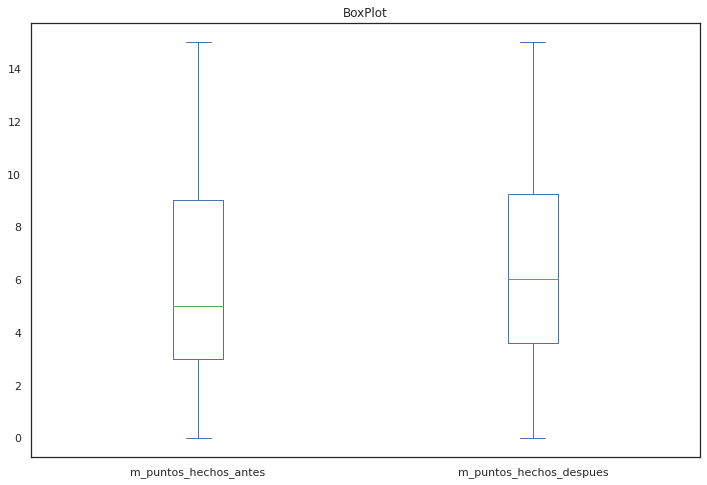

In [ ]:
df_medias_femenina.plot(kind='box',y=['m_puntos_hechos_antes','m_puntos_hechos_despues'],title="BoxPlot")

Cálculo de bigotes superior e inferior de las variables a utilizar en la regresión lineal.

In [ ]:
#m_victorias_antes
#bigote inferior
m_puntos_hechos_antes_i=desc_femenina['m_puntos_hechos_antes'][4] - 1.5 * (desc_femenina['m_puntos_hechos_antes'][6]-desc_femenina['m_puntos_hechos_antes'][4])
#bigote inferior
m_puntos_hechos_antes_s=desc_femenina['m_puntos_hechos_antes'][6] + 1.5 * (desc_femenina['m_puntos_hechos_antes'][6]-desc_femenina['m_puntos_hechos_antes'][4])

#m_victorias_despues
#bigote inferior
m_puntos_hechos_despues_i=desc_femenina['m_puntos_hechos_despues'][4] - 1.5 * (desc_femenina['m_puntos_hechos_despues'][6]-desc_femenina['m_puntos_hechos_despues'][4])
#bigote inferior
m_puntos_hechos_despues_s=desc_femenina['m_puntos_hechos_despues'][6] + 1.5 * (desc_femenina['m_puntos_hechos_despues'][6]-desc_femenina['m_puntos_hechos_despues'][4])

print('m_puntos_hechos_antes_i')
print(m_puntos_hechos_antes_i)
print("m_puntos_hechos_antes_s")
print(m_puntos_hechos_antes_s)
print("m_puntos_hechos_despues_i")
print(m_puntos_hechos_despues_i)
print("m_puntos_hechos_despues_s")
print(m_puntos_hechos_despues_s)

m_puntos_hechos_antes_i
-6.0
m_puntos_hechos_antes_s
18.0
m_puntos_hechos_despues_i
-4.875000000000002
m_puntos_hechos_despues_s
17.725


Eliminación de Outliers utilizando los bigotes superior e inferior calculados.

In [ ]:
df_medias_femenina_outlier_4 = df_medias_femenina[(df_medias_femenina['m_puntos_hechos_antes']<m_puntos_hechos_antes_s) & (df_medias_femenina['m_puntos_hechos_antes']>m_puntos_hechos_antes_i) & (df_medias_femenina['m_puntos_hechos_despues']<m_puntos_hechos_despues_s) & (df_medias_femenina['m_puntos_hechos_despues']>m_puntos_hechos_despues_i)]

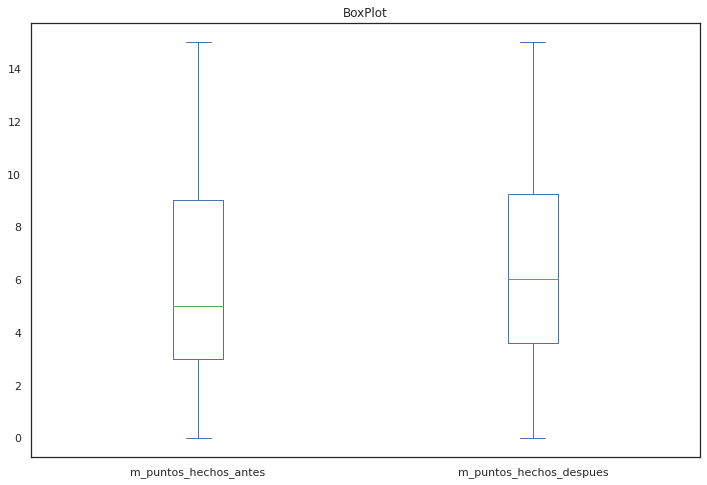

In [ ]:
df_medias_femenina_outlier_4.plot(kind='box',y=['m_puntos_hechos_antes','m_puntos_hechos_despues'],title="BoxPlot")

In [ ]:
selected_features = ['m_puntos_hechos_antes']#, 'm_goles_recibidos_antes','m_puntos_hechos_antes', 'm_victorias_antes']
selected_variable = 'm_puntos_hechos_despues'

Separar en train y test

In [ ]:
p_train = 0.80 # Porcentaje de train.

entreno = df_medias_femenina_outlier_4[:int((len(df_medias_femenina_outlier_4))*p_train)]
testeo = df_medias_femenina_outlier_4[int((len(df_medias_femenina_outlier_4))*p_train):]

print("Ejemplos usados para entrenar: ", len(entreno))
print("Ejemplos usados para test: ", len(testeo))

Ejemplos usados para entrenar:  116
Ejemplos usados para test:  29


Construcción  preliminar del modelo

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()
entre_x = np.asanyarray(entreno[['m_puntos_hechos_antes']])
entre_y = np.asanyarray(entreno[['m_puntos_hechos_despues']])
model.fit(entre_x, entre_y)


LinearRegression()

Coeficientes

In [ ]:
#print(selected_features)
#print('Coefientes: ', model.coef_)
print ('Coeficientes')
pd.DataFrame({'Nombre Variable': (selected_features) ,
              'Coefientes': model.coef_[0]})

Coeficientes


,Nombre Variable,Coefientes
0,m_puntos_hechos_antes,0.539062


In [ ]:
print('Interseccion', model.intercept_)

Interseccion [3.45075506]


Probar modelo

In [ ]:
x_test=np.asanyarray(testeo[selected_features])

In [ ]:
y_pred = model.predict(x_test)

Metricas de error

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error = mean_squared_error(testeo[selected_variable], y_pred)
print ('mean_squared_error', mean_squared_error)

mean_squared_error 9.358319828673036


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error = mean_absolute_error(testeo[selected_variable], y_pred)
print ('mean_absolute_error', mean_absolute_error)

mean_absolute_error 2.512884743077469


In [ ]:
from sklearn.metrics import r2_score
R2 = r2_score(testeo[selected_variable], y_pred)
print ('R2', R2)

R2 0.3323873049544358


Grafica de la variable independiente vs la varaiable dependiente y la regresión lineal generada.

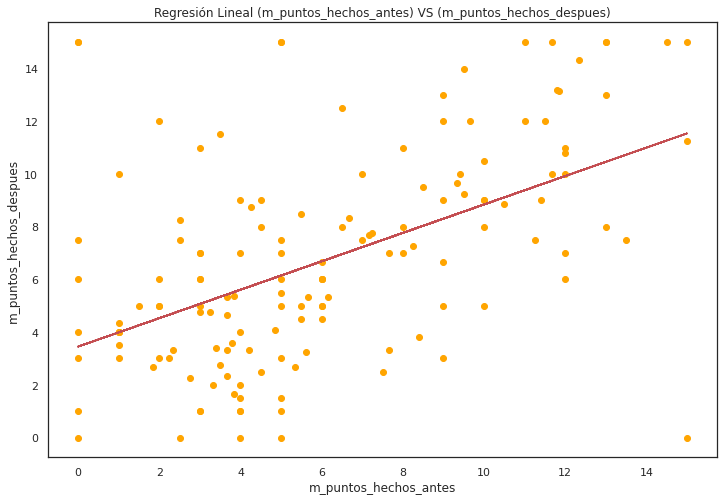

In [ ]:
#plt.scatter(df_medias.m_puntos_hechos_antes, df_medias.m_puntos_hechos_despues, color='orange')#mostramos los datos
plt.scatter(df_medias_femenina.m_puntos_hechos_antes, df_medias_femenina.m_puntos_hechos_despues, color='orange')#mostramos los datos
plt.plot(entre_x, model.coef_[0][0]*entre_x + model.intercept_[0],'-r')#Trazamos la linea
plt.title("Regresión Lineal (m_puntos_hechos_antes) VS (m_puntos_hechos_despues)")
plt.xlabel('m_puntos_hechos_antes')
plt.ylabel('m_puntos_hechos_despues')
plt.show()